In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

cdt = os.getcwd()
datafile = os.path.normpath(os.path.join(cdt, "../final/LOCMM_03062025_DATASET_VITAMINdv2.csv"))
print(datafile)


c:\mydata\G8Vitamin\src\final\LOCMM_03062025_DATASET_VITAMINdv2.csv


In [3]:
# Using raw string to avoid issues with backslashes
df = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\LOCMM_03062025_DATASET_VITAMINdv2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30065 entries, 0 to 30064
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      30065 non-null  float64
 1   Gender                    30065 non-null  float64
 2   Age                       30065 non-null  float64
 3   Race                      30065 non-null  float64
 4   BMXWT                     29603 non-null  float64
 5   BMXHT                     29635 non-null  float64
 6   BMI                       29511 non-null  float64
 7   WaistCircumference        28600 non-null  float64
 8   FastingGlucose            28302 non-null  float64
 9   UricAcid                  27995 non-null  float64
 10  ALT                       27923 non-null  float64
 11  AST                       27912 non-null  float64
 12  AlkalinePhosphotase       27948 non-null  float64
 13  TotalCholesterol          27948 non-null  float64
 14  Creati

In [81]:
# Remove columns not needed to measure data quality
remove_columns = [
    'SEQN', 'YearID', 'HBsAg'
]

df_dq = df.drop(columns=remove_columns)

In [82]:
# Describe data
df_dq.describe()

,Gender,Age,Race,BMXWT,BMXHT,BMI,WaistCircumference,FastingGlucose,UricAcid,ALT,...,LDLCholesterol,Hemoglobin,Hematocrit,MeanCellVolumn,MeanCellHemoglobin,RedCellDistributionWidth,PlateletCount,MeanPlateletVolume,Hba1c,VitaminD
count,30065.000000,30065.000000,30065.000000,29603.000000,29635.000000,29511.000000,28600.000000,28302.000000,27995.000000,27923.000000,...,27040.000000,28430.000000,28430.000000,28430.000000,28437.000000,28430.000000,28429.000000,28429.000000,28397.000000,27722.000000
mean,1.509795,42.055247,2.964776,77.759839,166.845144,27.808903,94.892441,105.512805,281.661585,23.869928,...,2.818153,14.144442,41.847925,88.790823,33.782270,13.147531,252.426392,8.216663,5.624640,61.177916
std,0.499912,21.568578,1.202015,21.924181,10.184582,7.018505,17.433479,33.886849,129.982823,24.291074,...,0.921701,1.538921,4.351836,5.906244,1.007795,1.332284,67.487238,0.916113,1.007977,25.797952
min,1.000000,12.000000,1.000000,25.100000,123.100000,12.610000,52.000000,21.000000,2.133000,3.000000,...,0.233000,5.900000,16.300000,50.800000,25.100000,9.700000,4.000000,4.700000,3.300000,5.490000
25%,1.000000,21.000000,2.000000,62.400000,159.400000,22.800000,81.700000,91.000000,232.000000,15.000000,...,2.170000,13.100000,38.900000,85.800000,33.200000,12.300000,207.000000,7.600000,5.100000,43.200000
50%,2.000000,40.000000,3.000000,74.800000,166.400000,26.800000,94.000000,98.000000,297.400000,19.000000,...,2.720000,14.100000,41.900000,89.300000,33.800000,12.900000,245.000000,8.100000,5.400000,58.700000
75%,2.000000,60.000000,4.000000,89.700000,174.200000,31.400000,105.900000,107.000000,362.800000,26.000000,...,3.362000,15.200000,44.900000,92.400000,34.400000,13.600000,290.000000,8.800000,5.700000,75.300000
max,2.000000,85.000000,5.000000,371.000000,204.100000,130.210000,176.000000,686.200000,1070.600000,1997.000000,...,16.266000,19.700000,59.000000,121.900000,69.600000,37.800000,1000.000000,13.600000,18.000000,375.000000


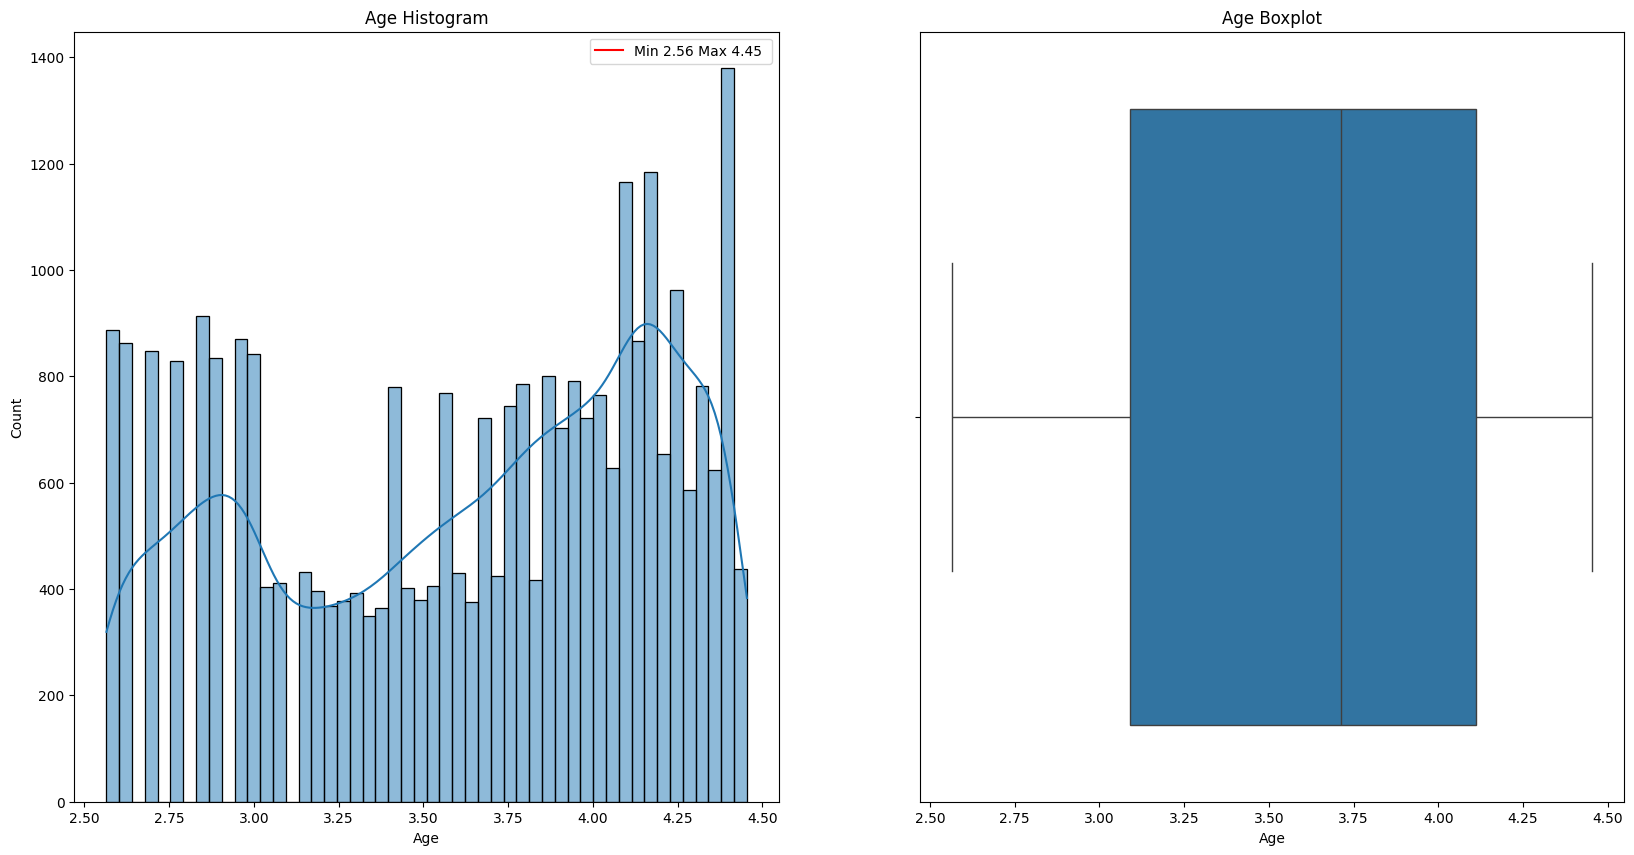

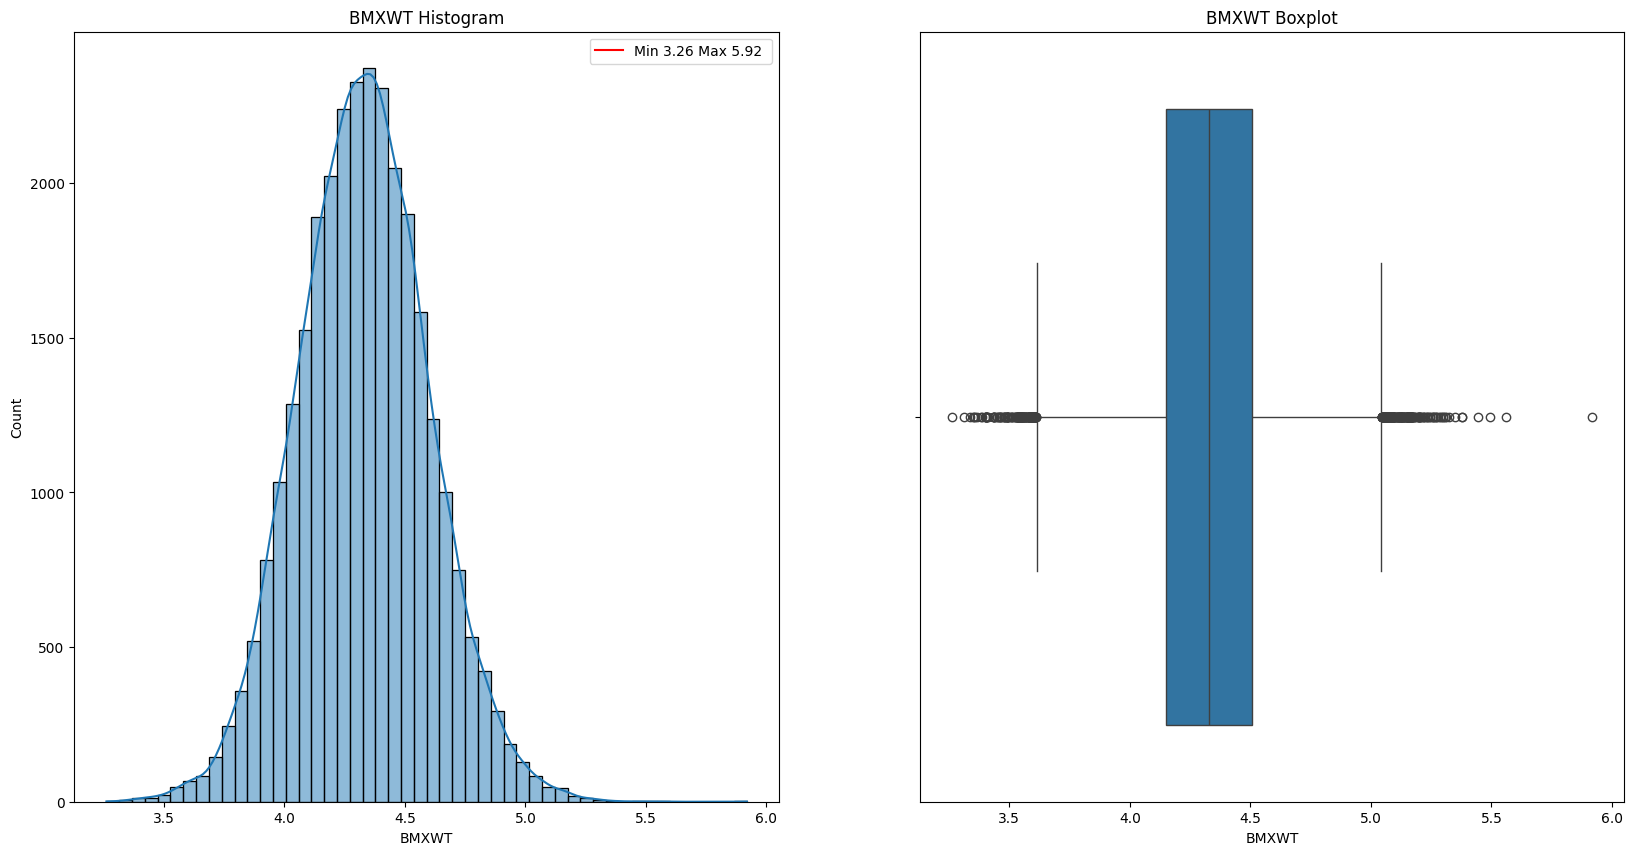

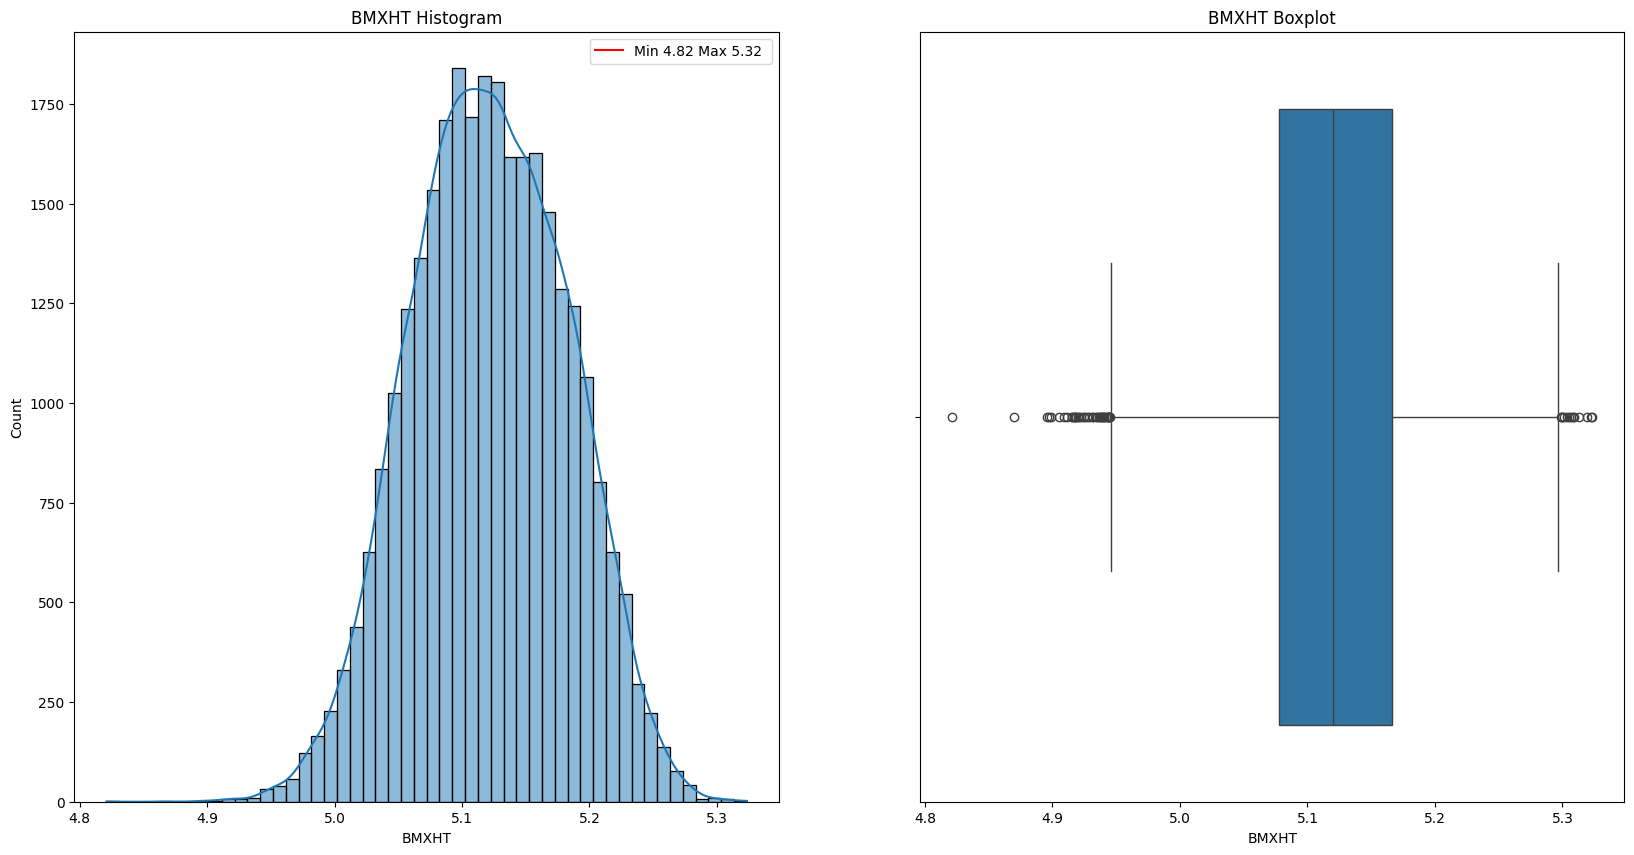

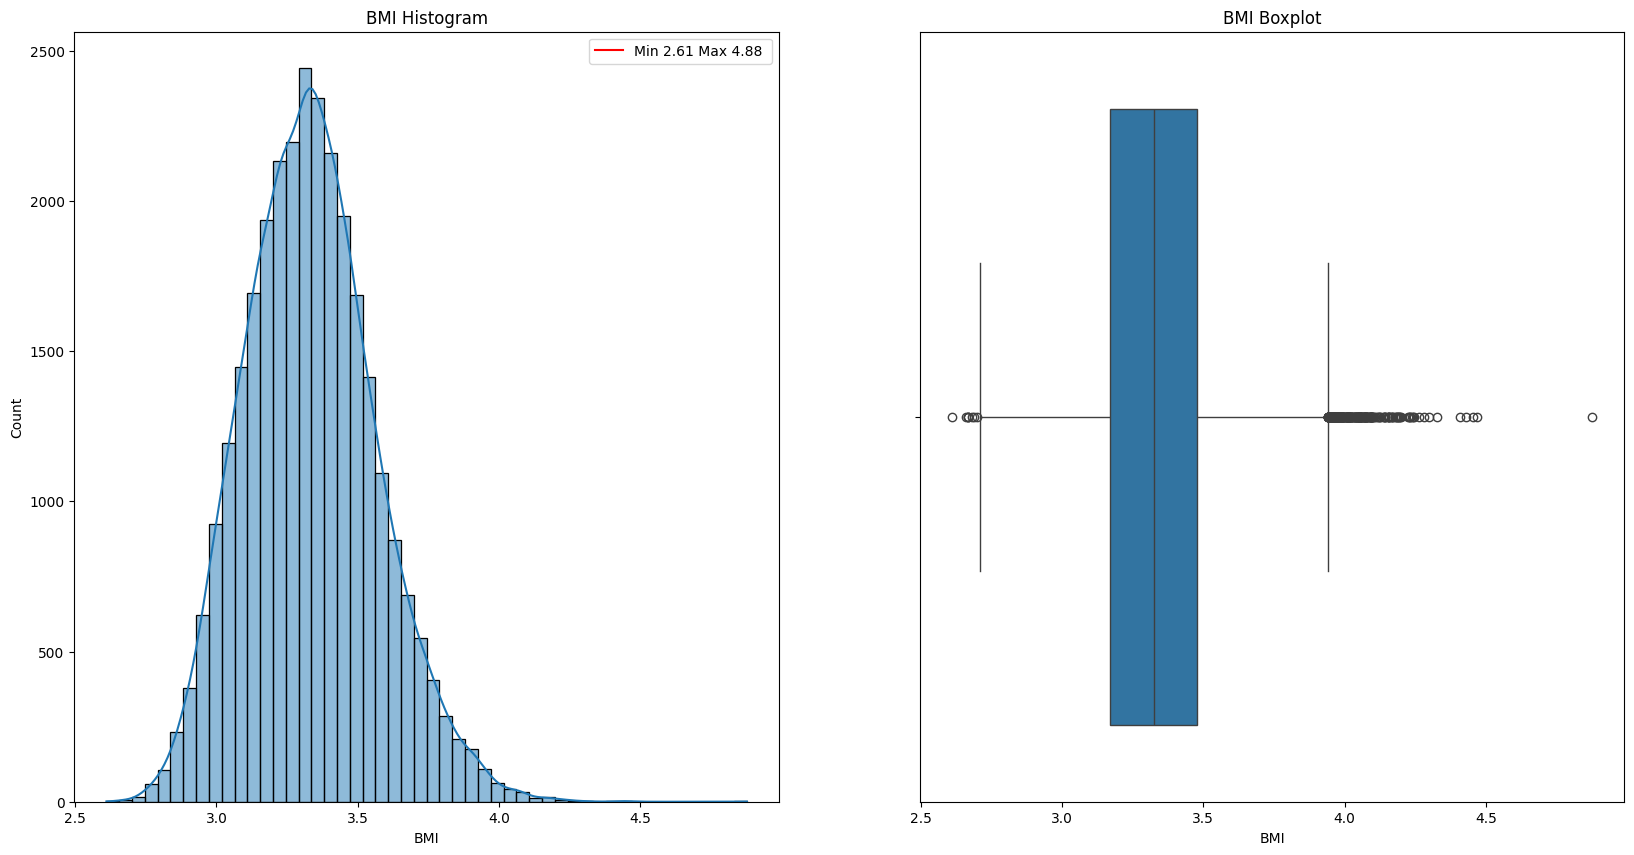

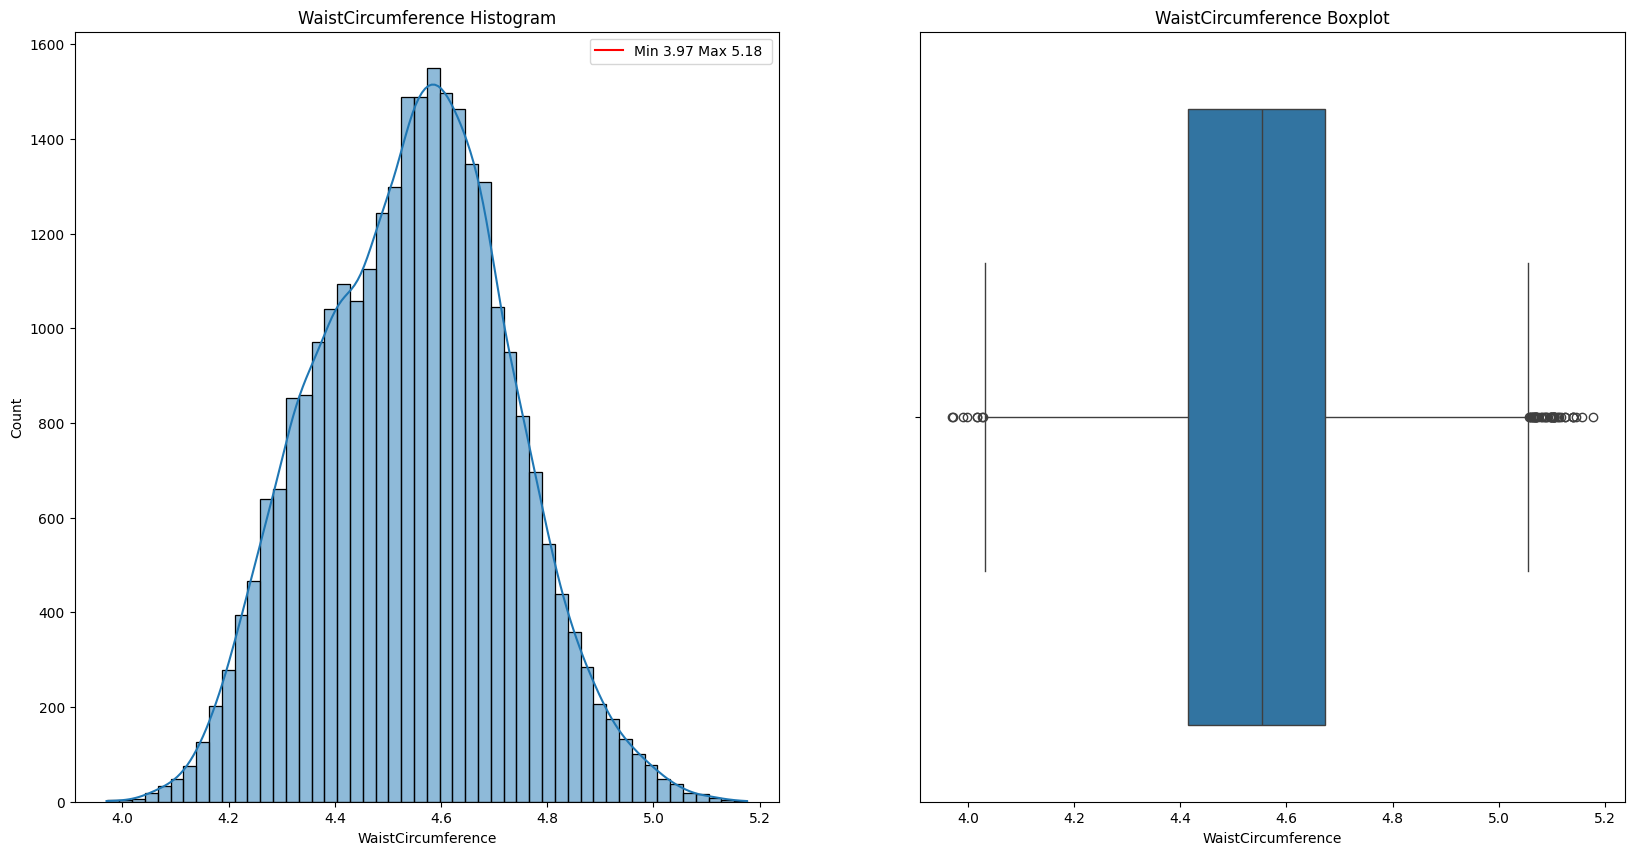

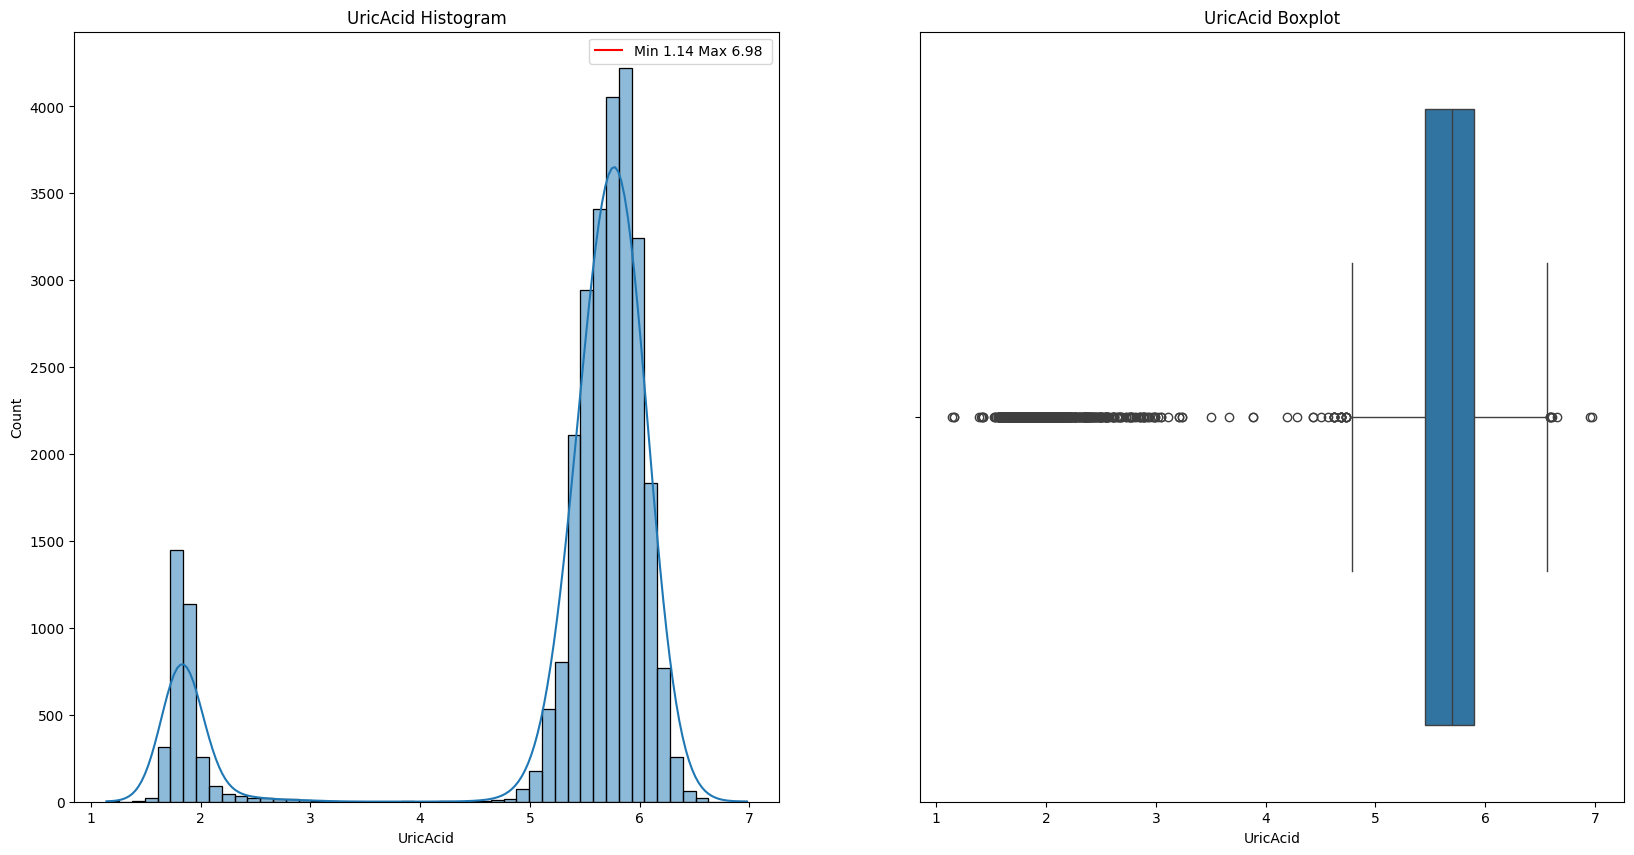

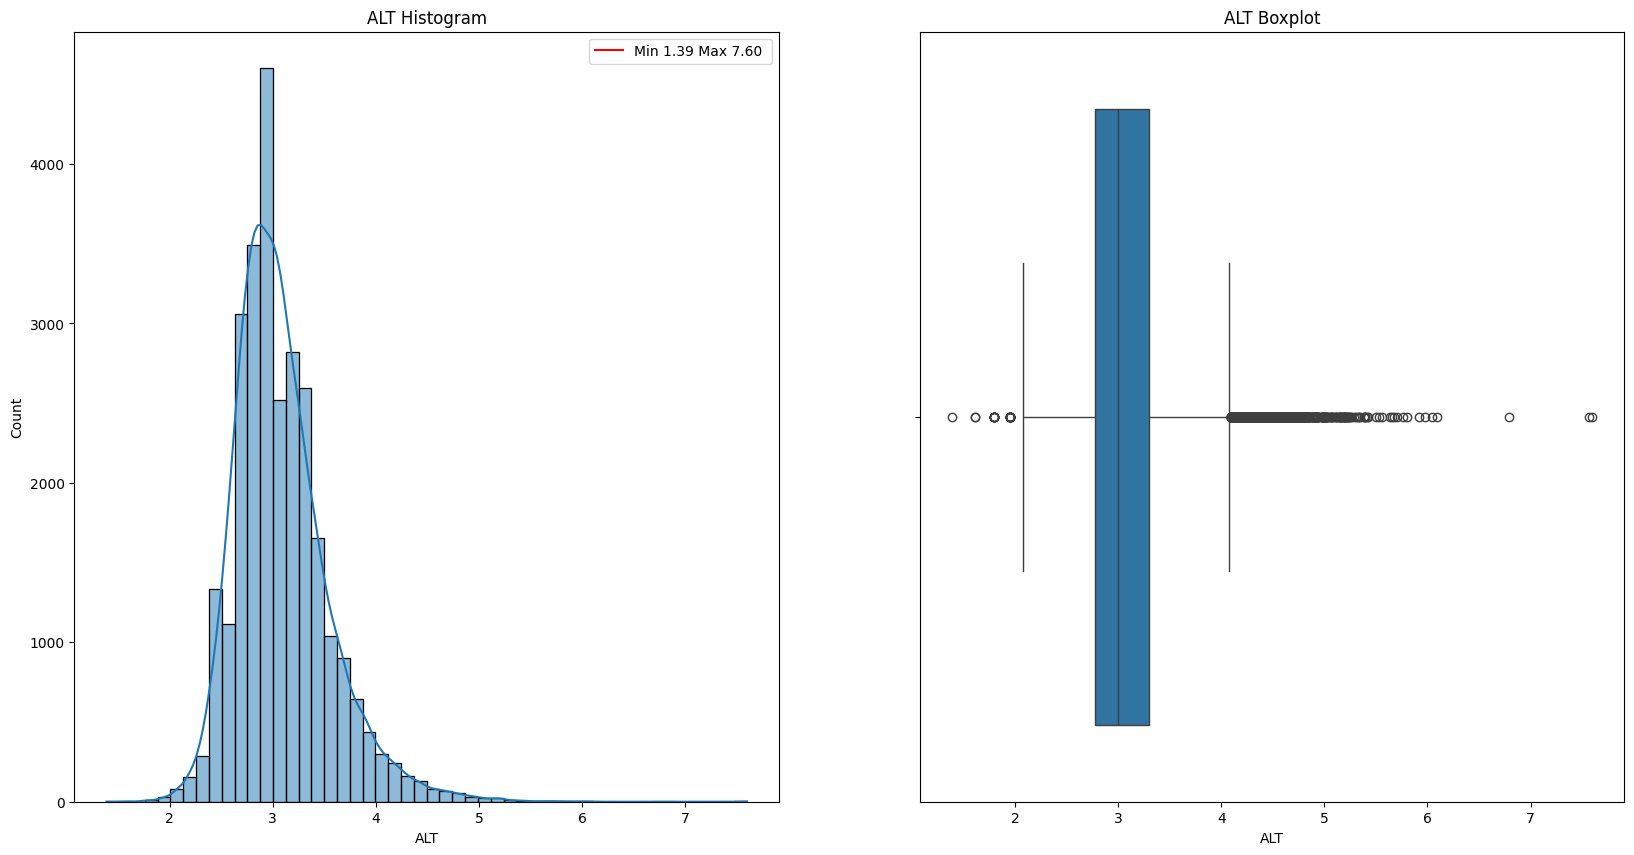

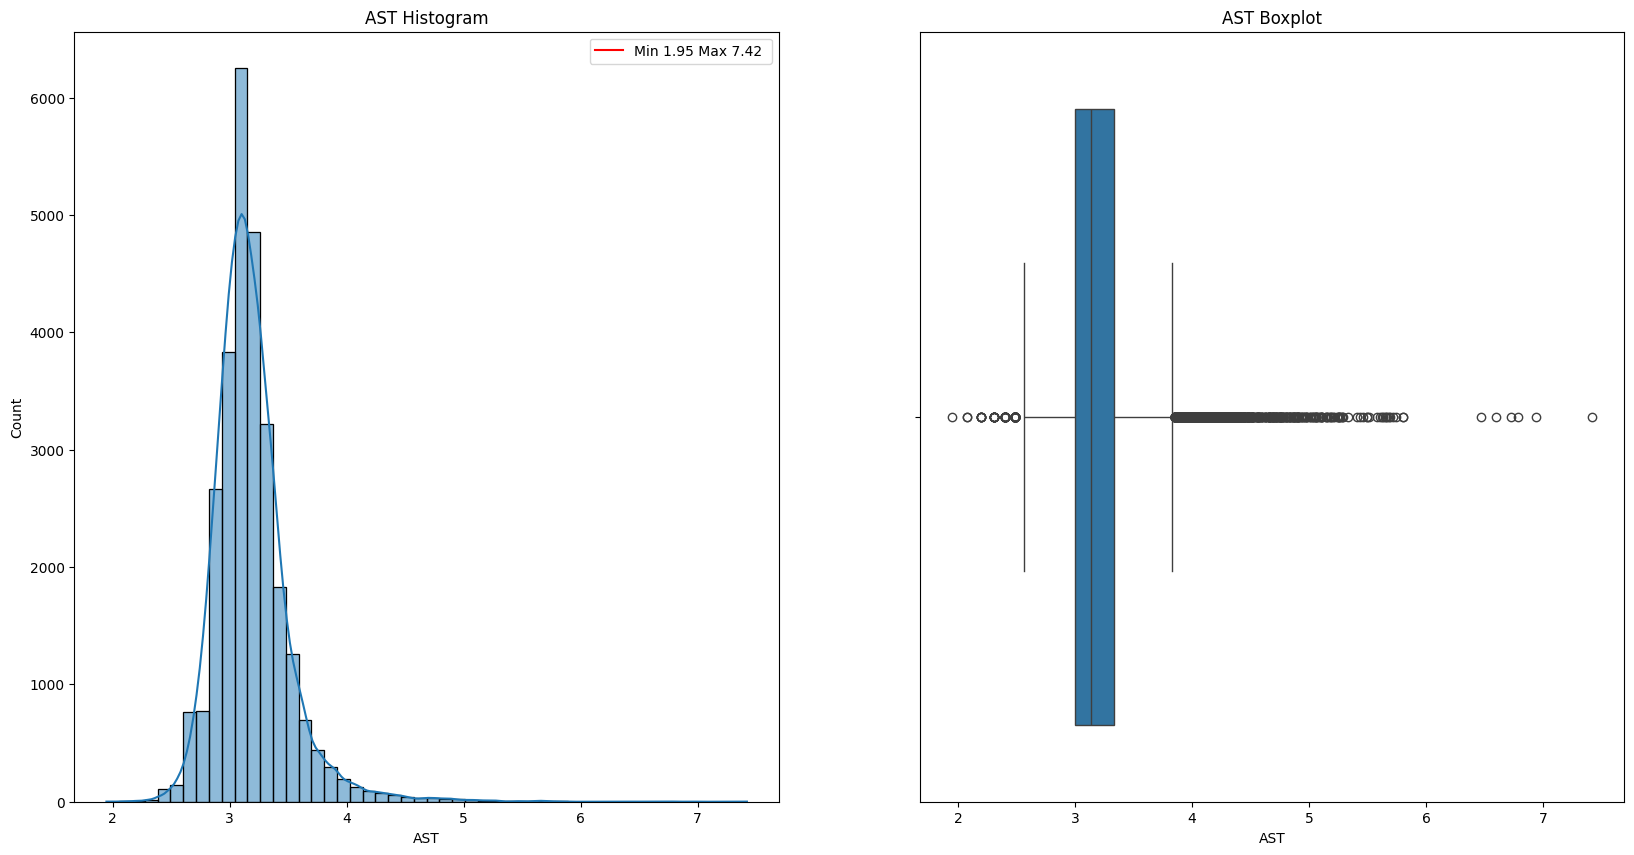

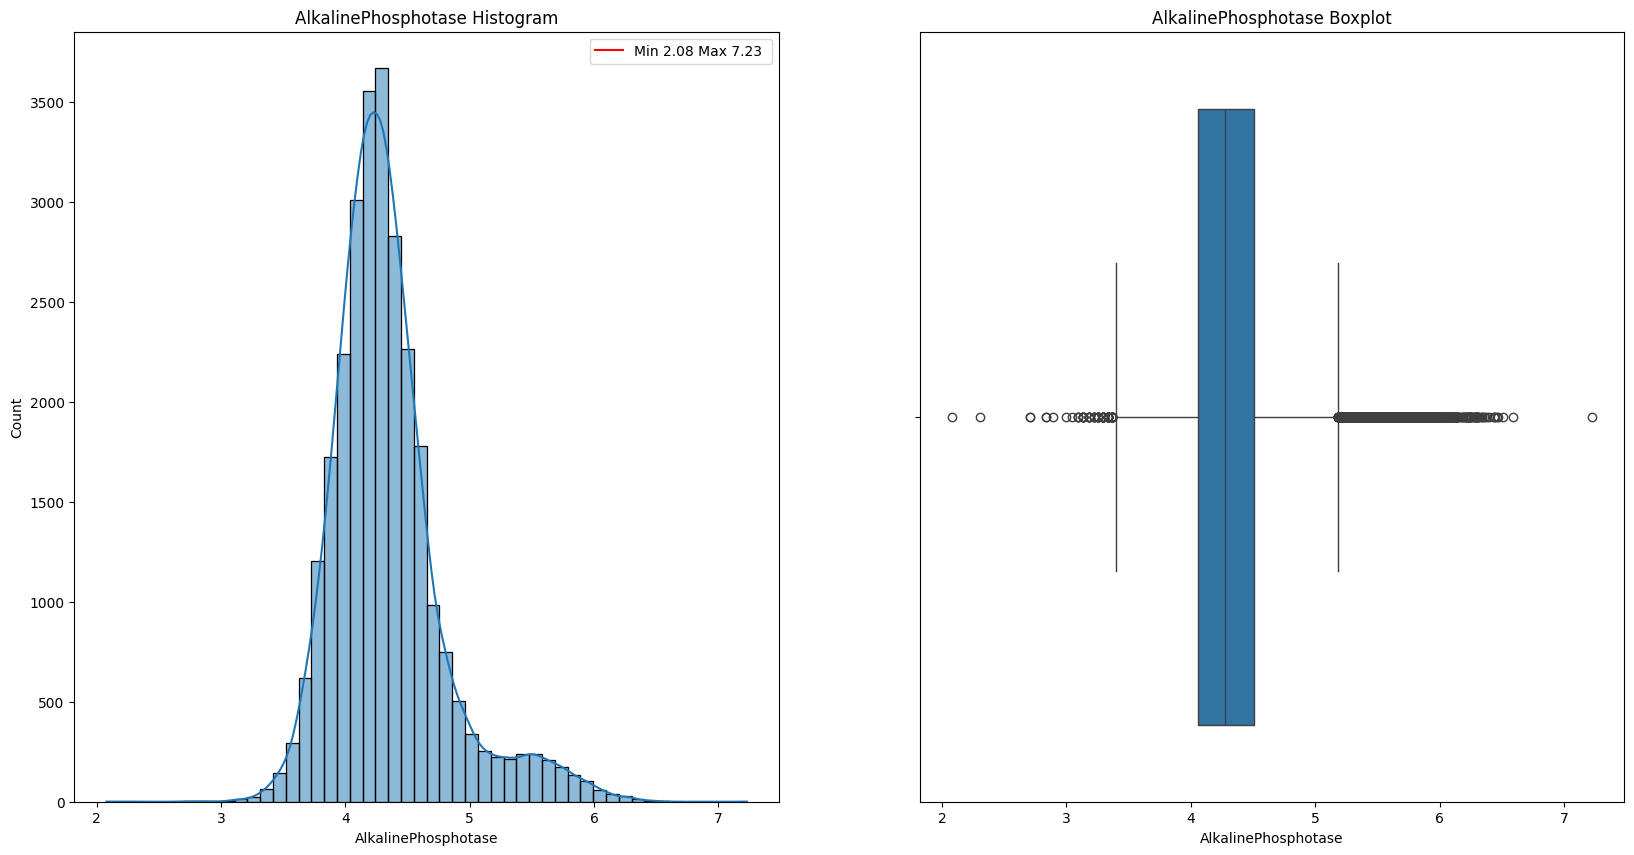

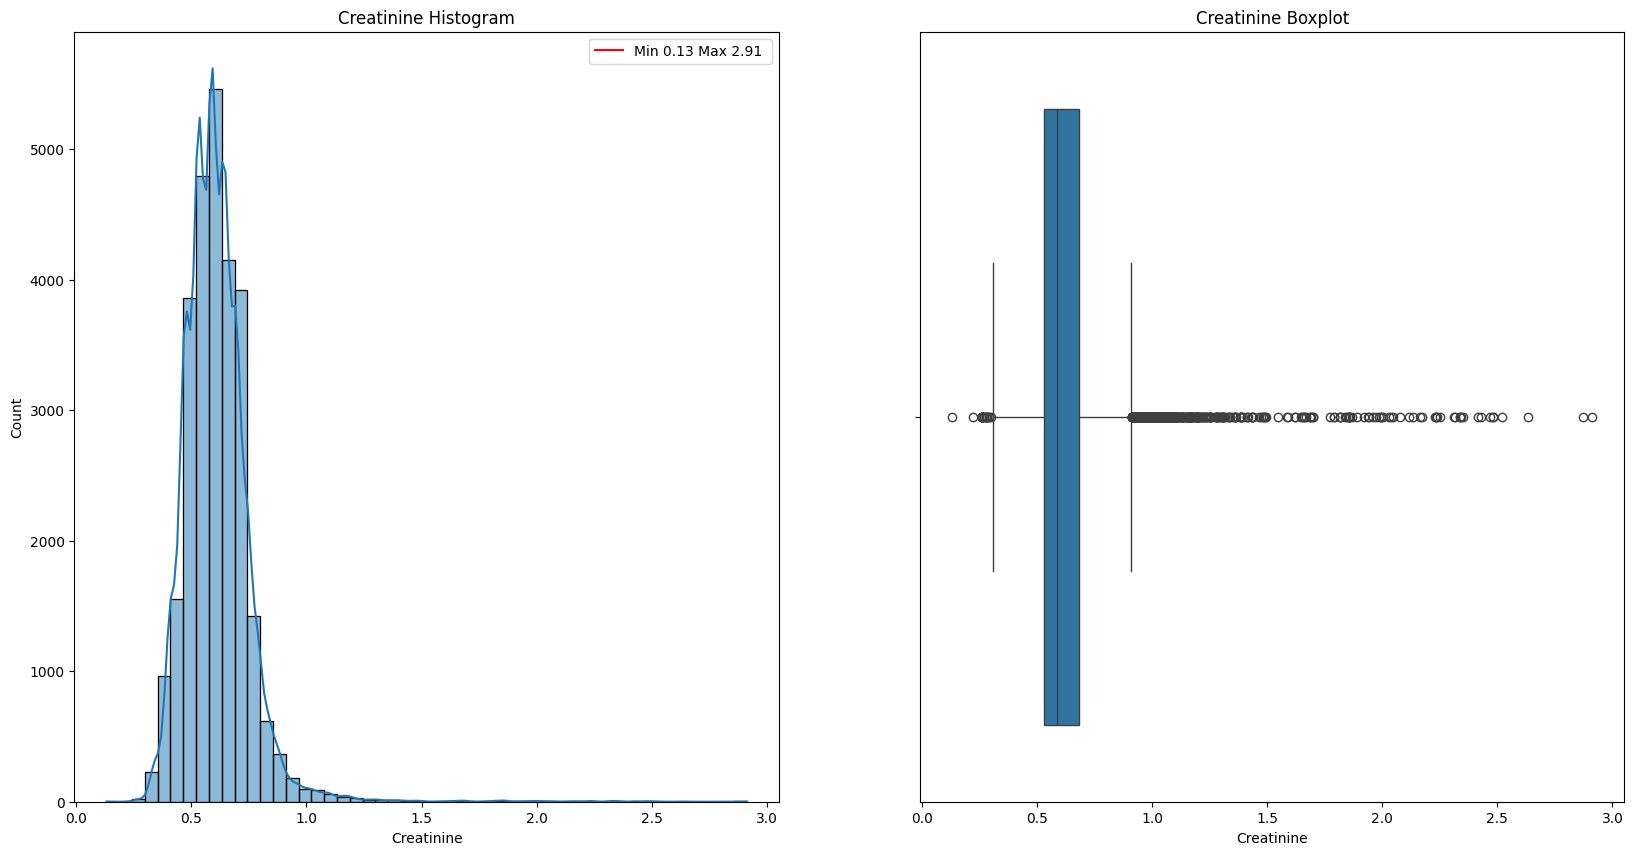

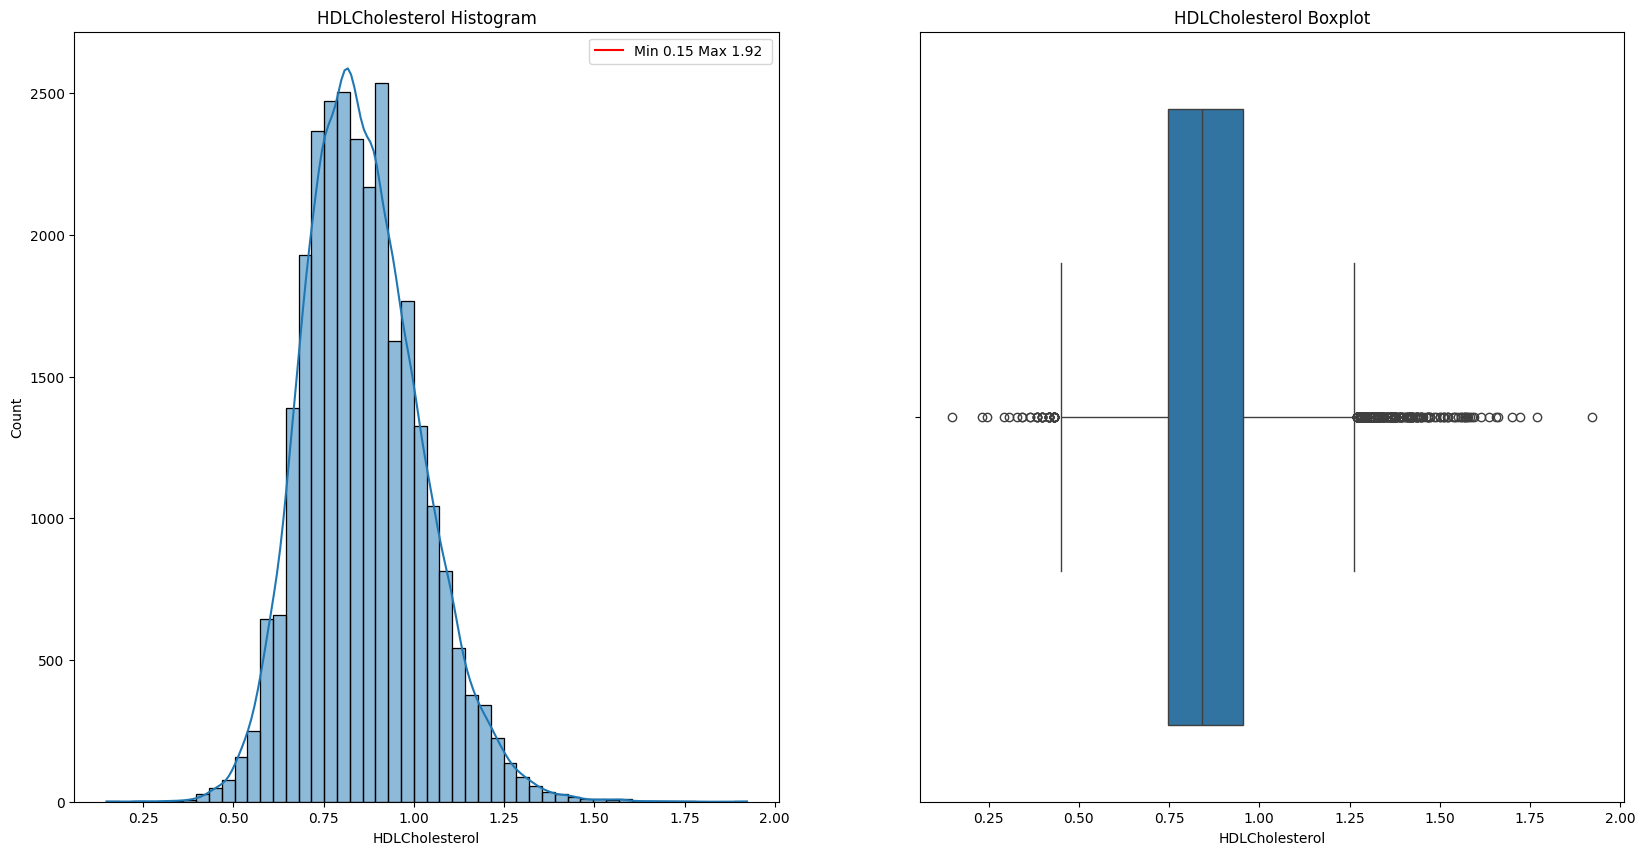

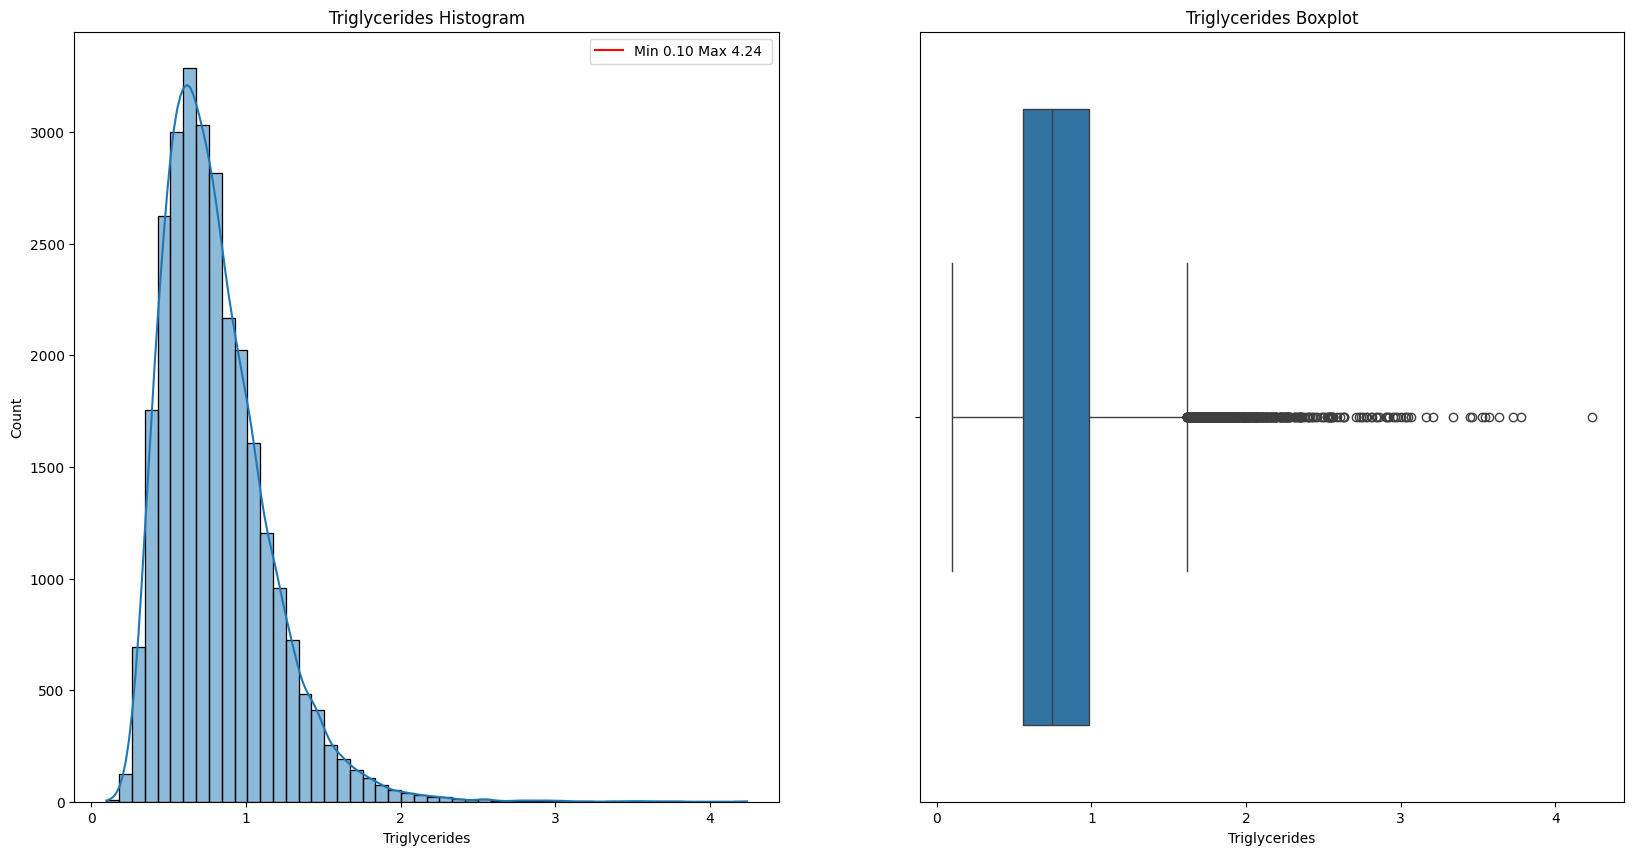

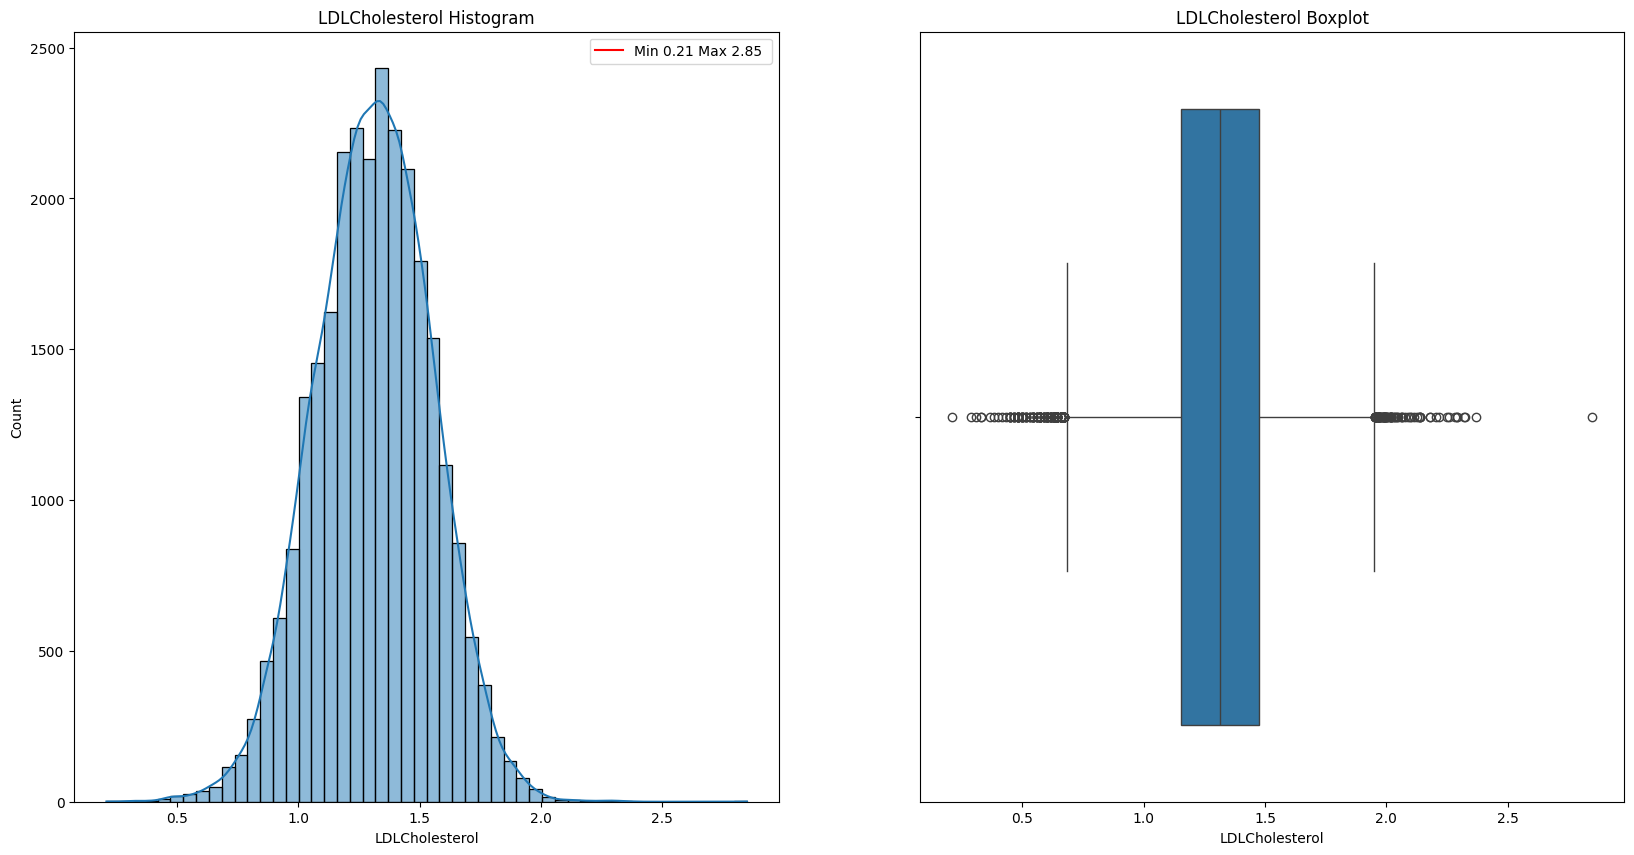

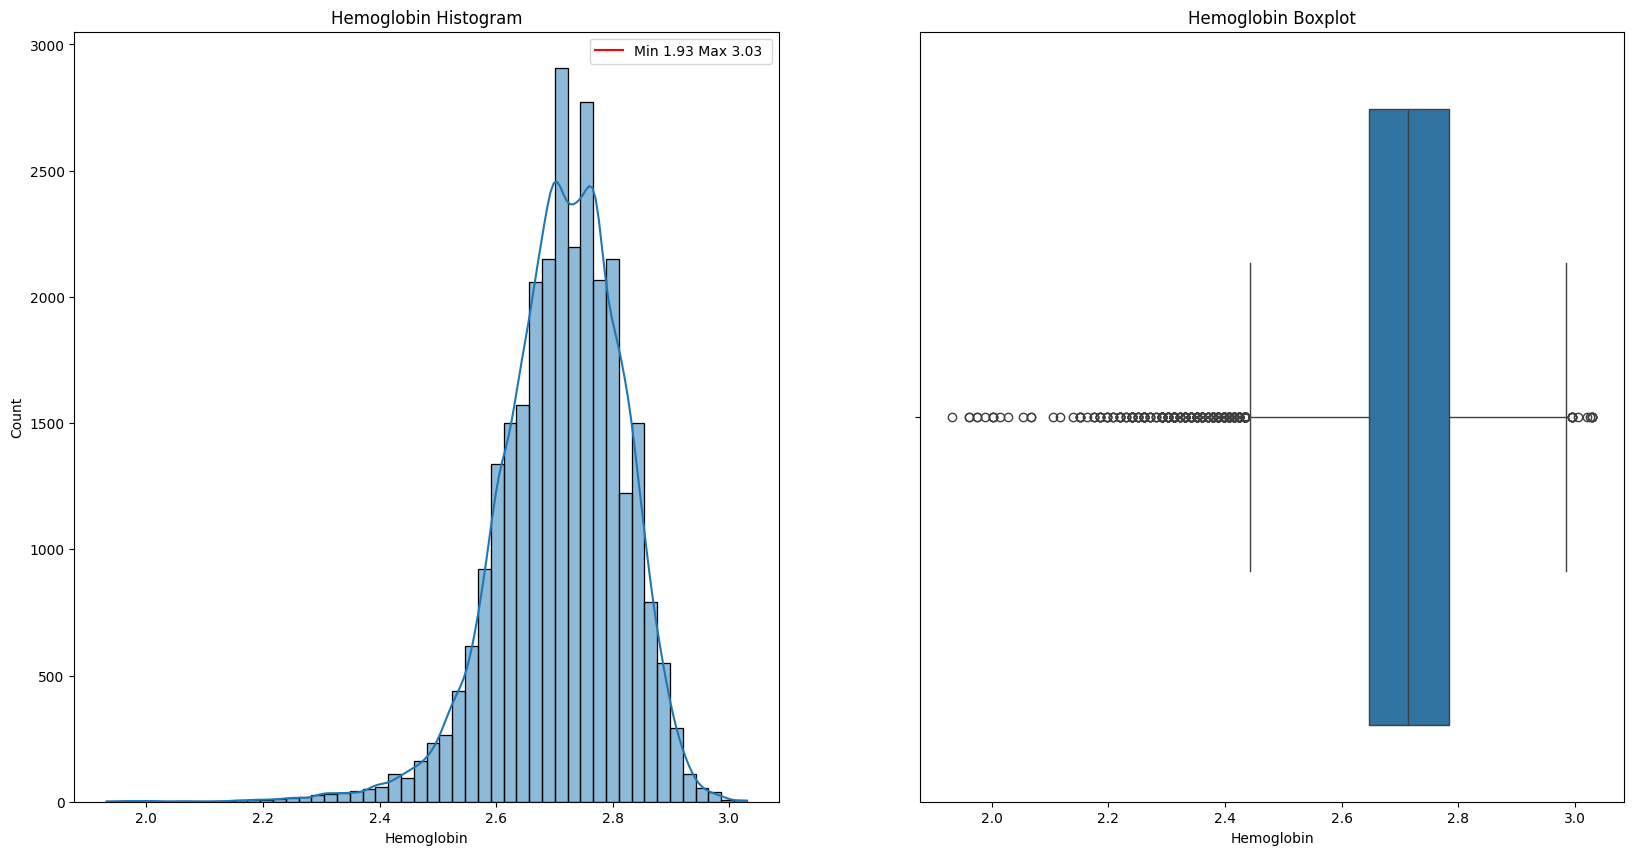

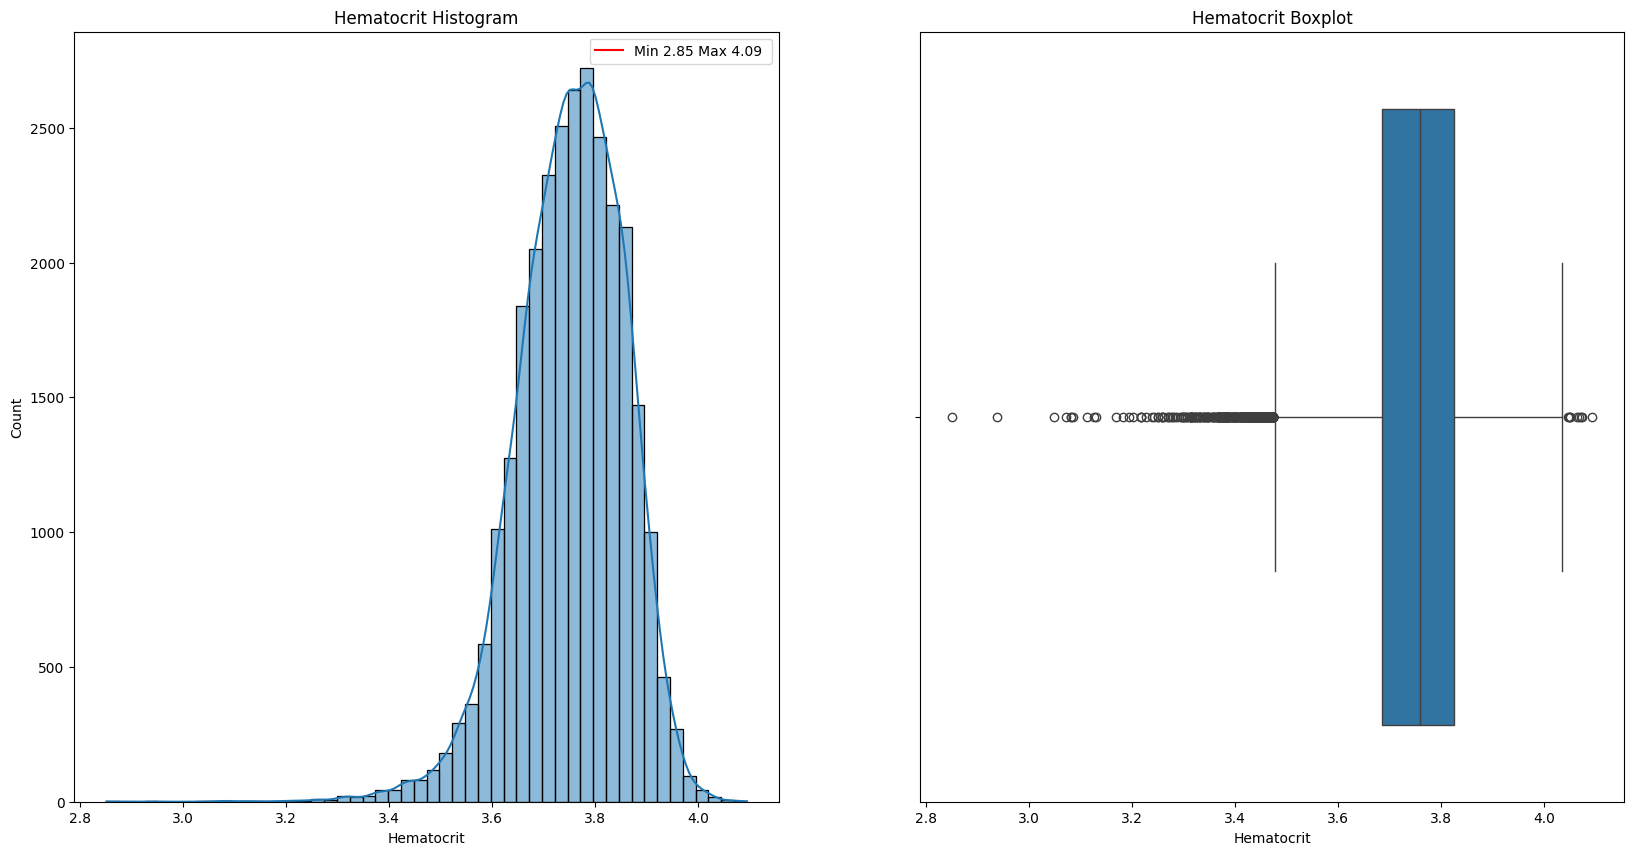

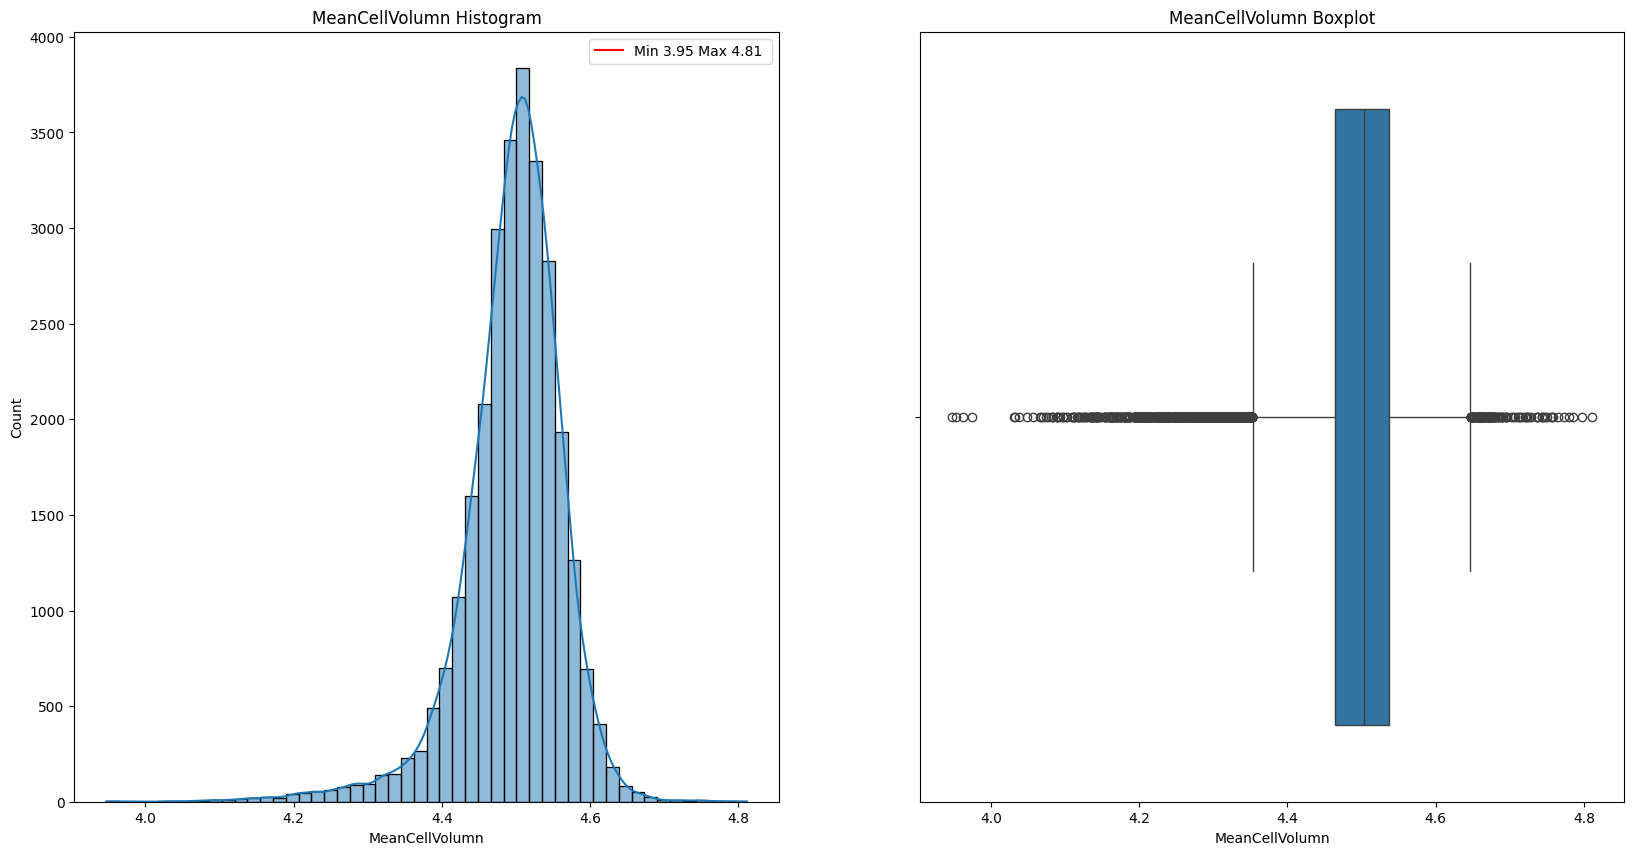

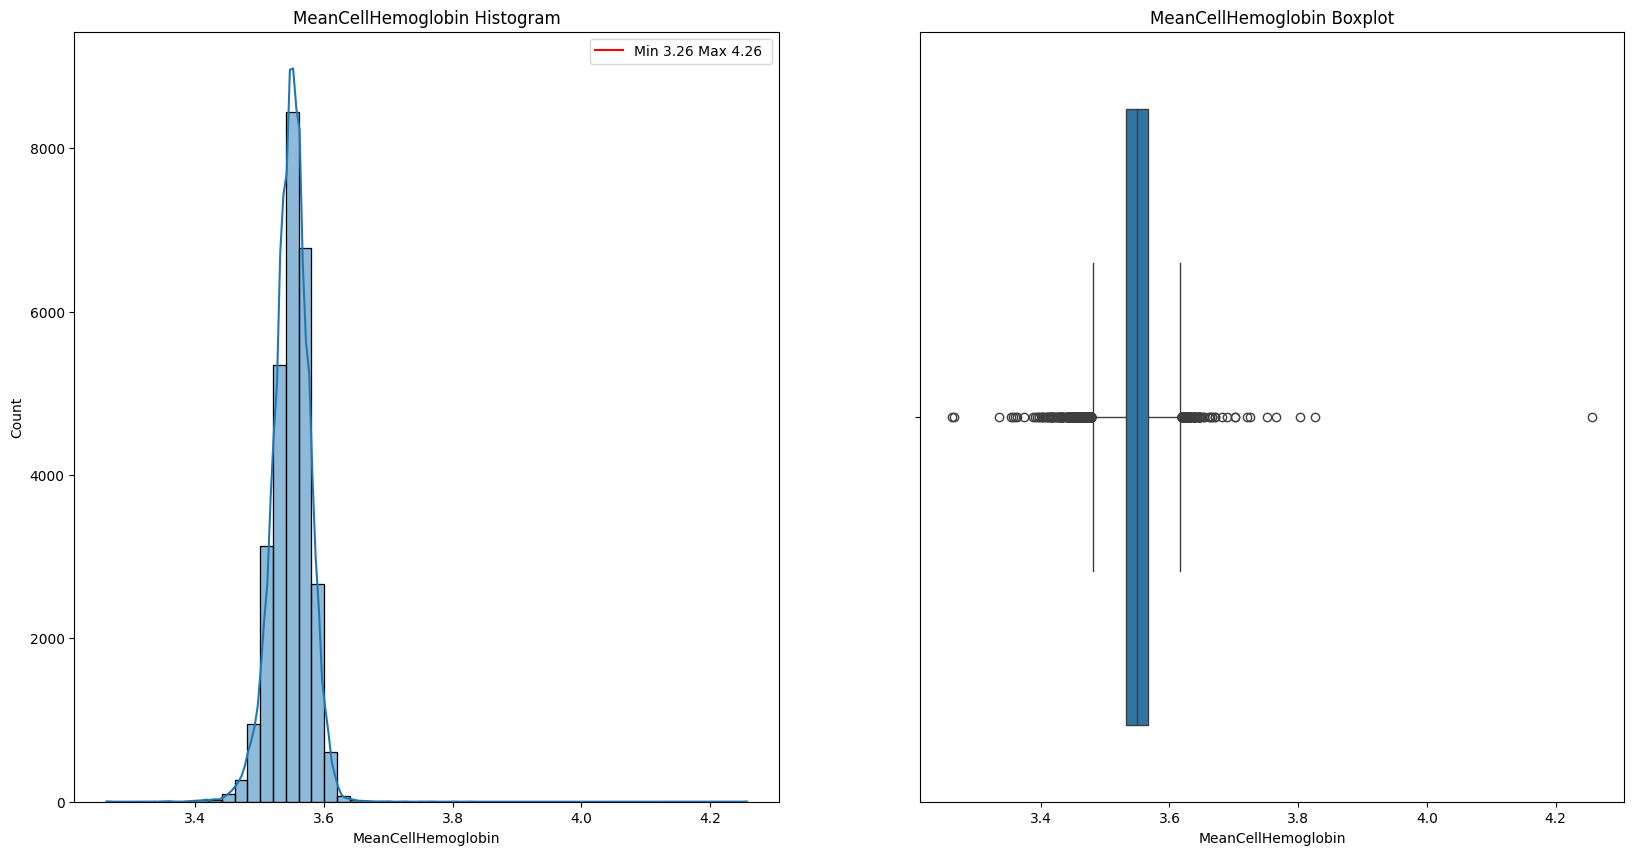

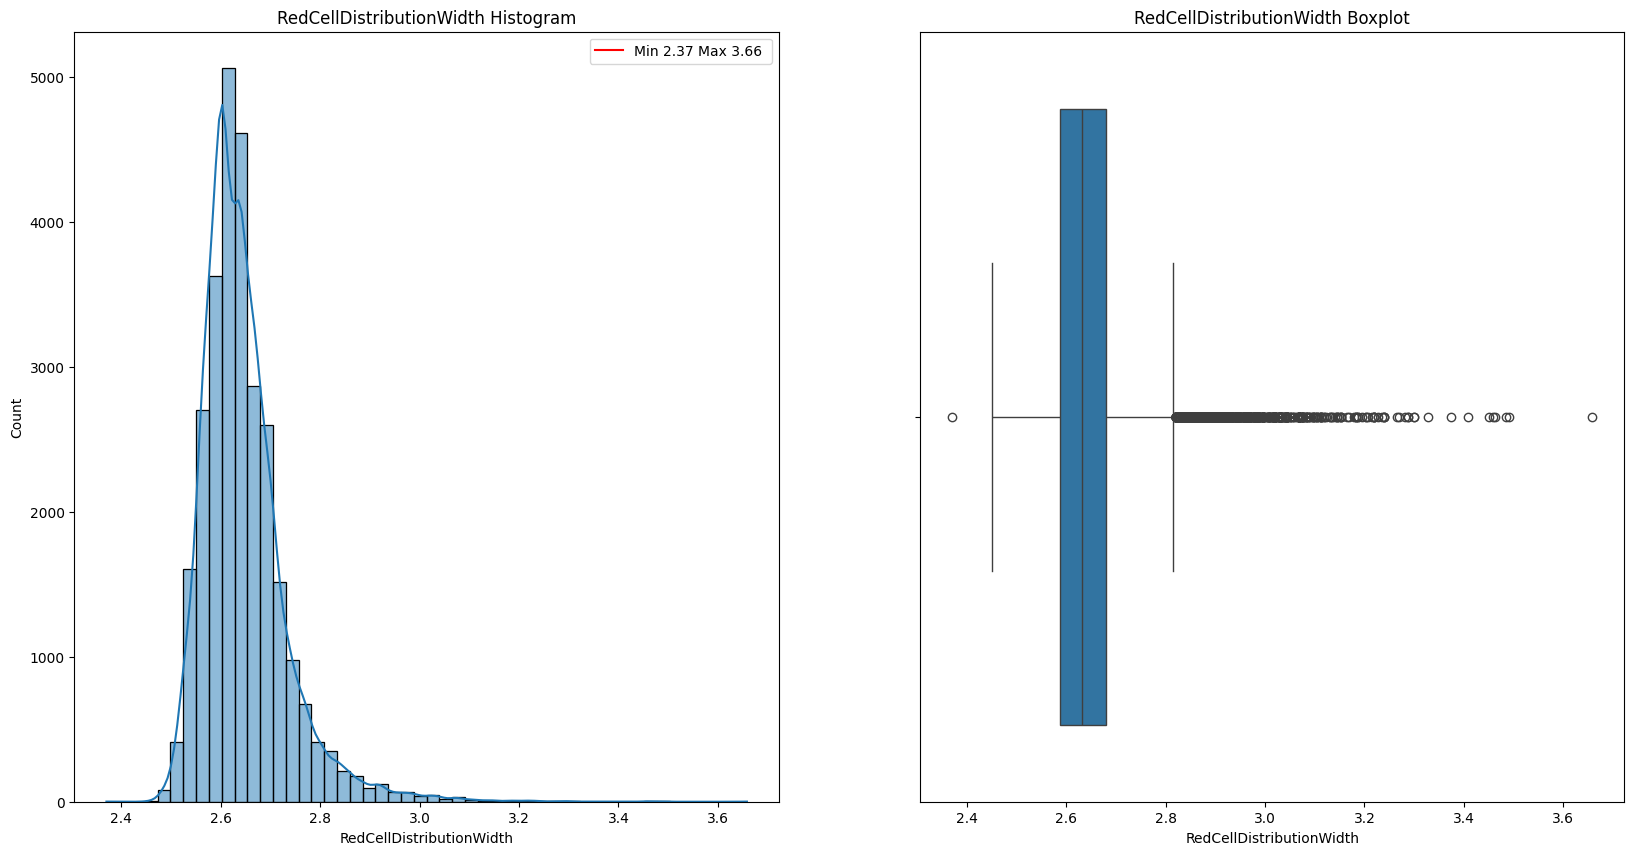

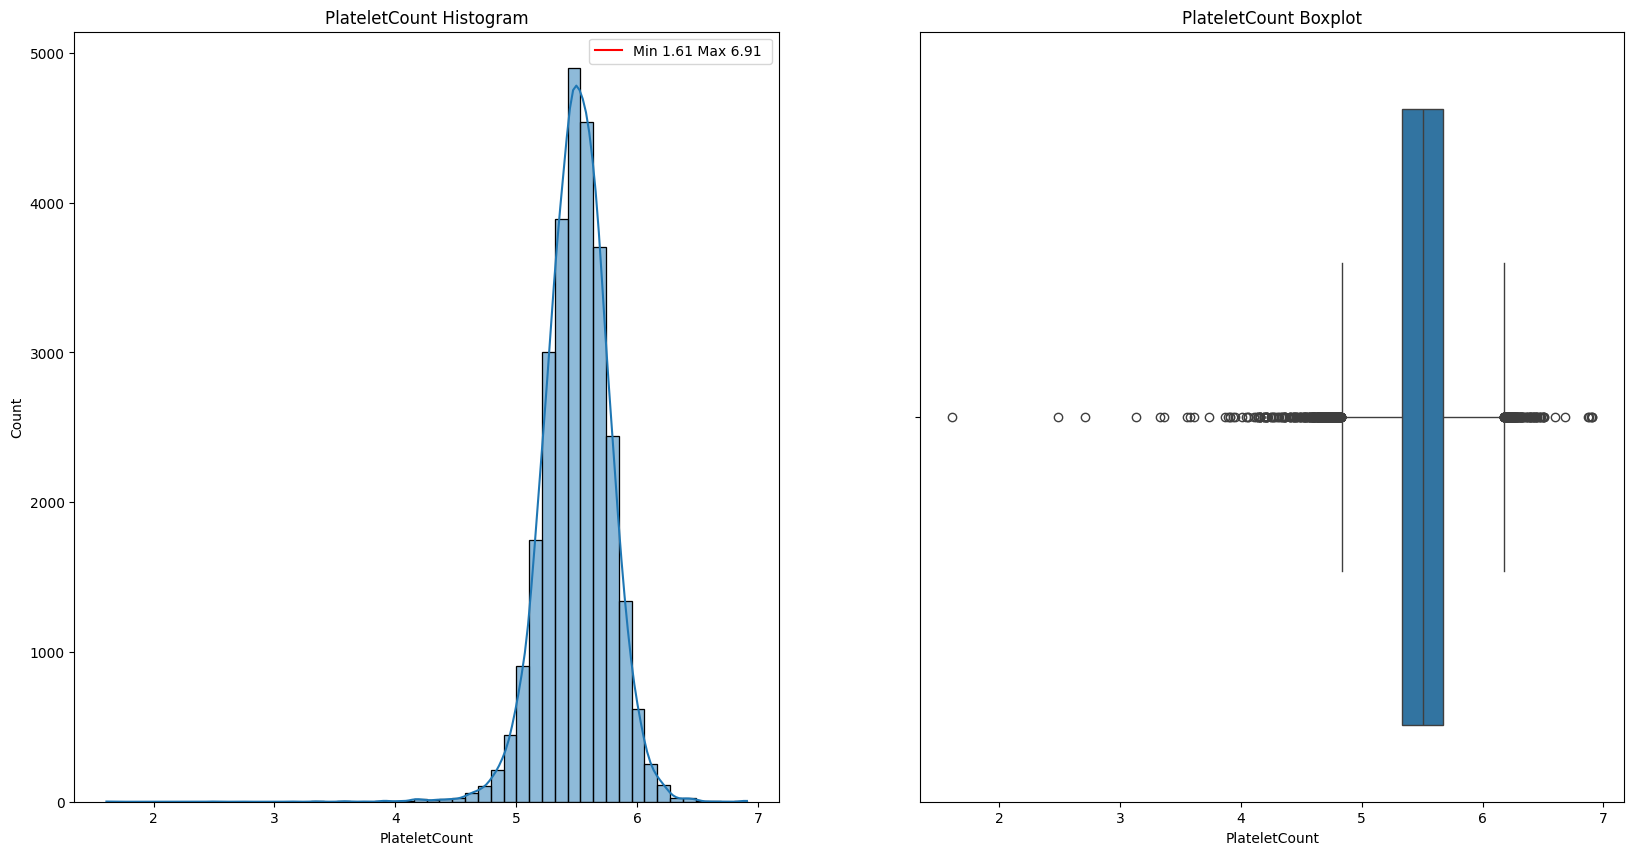

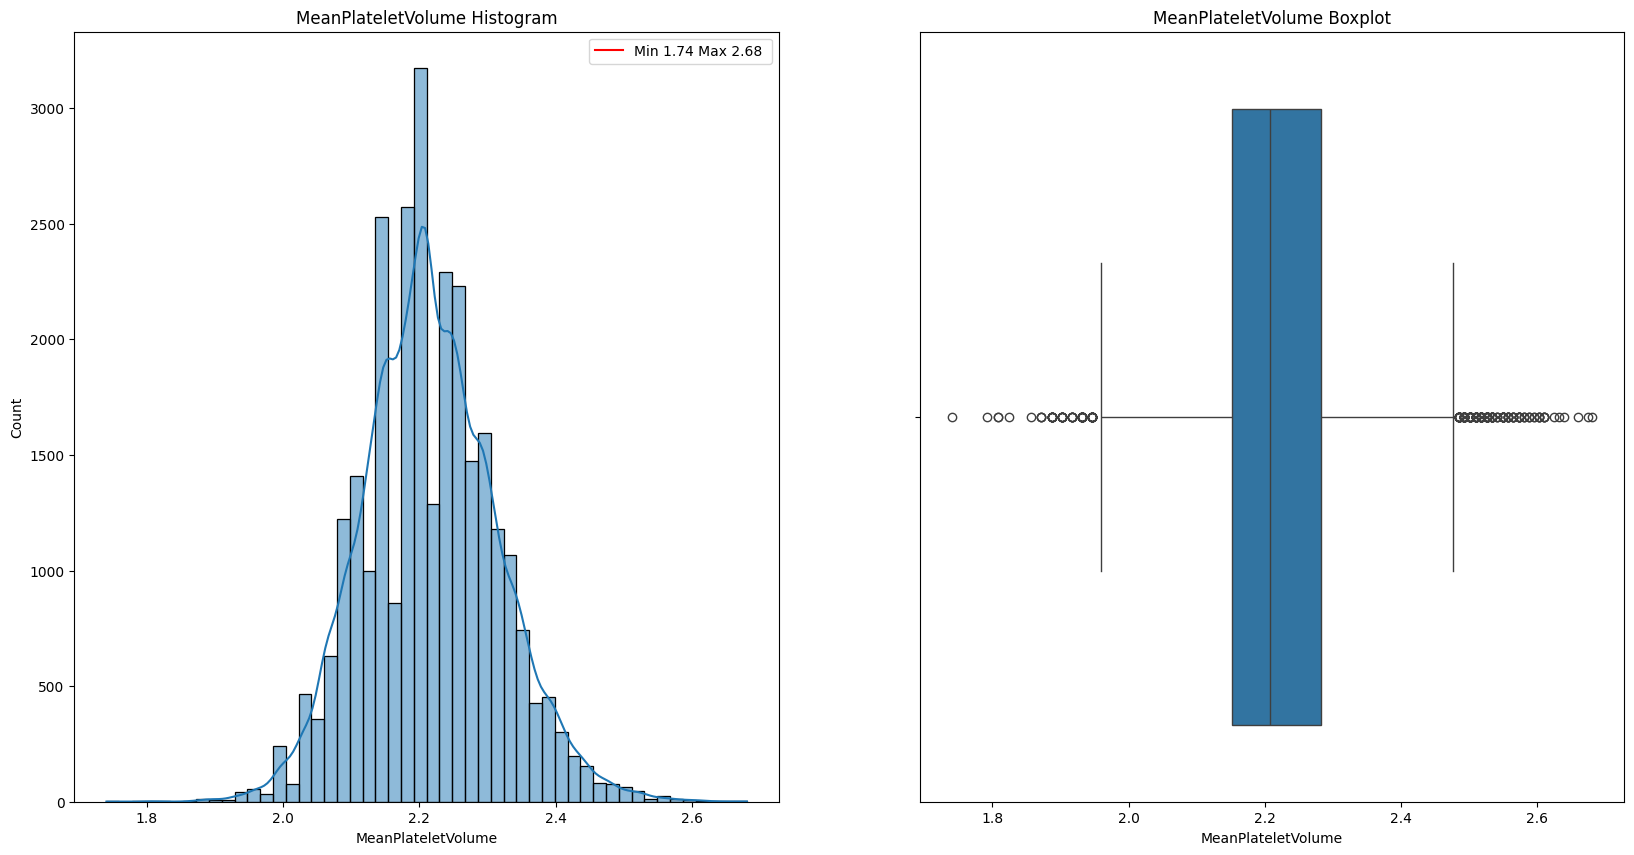

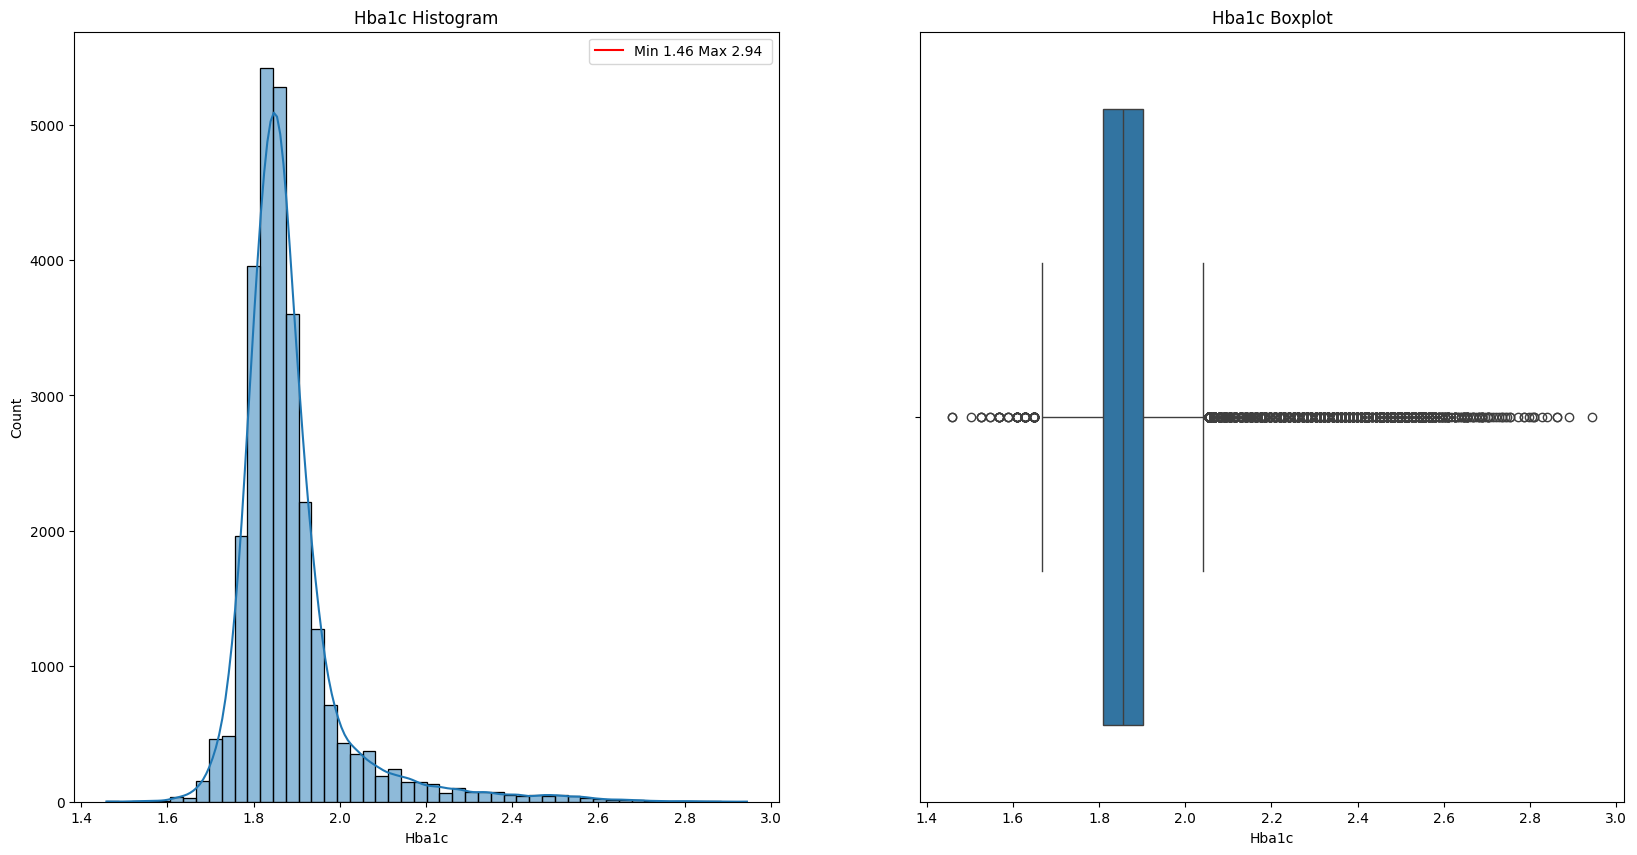

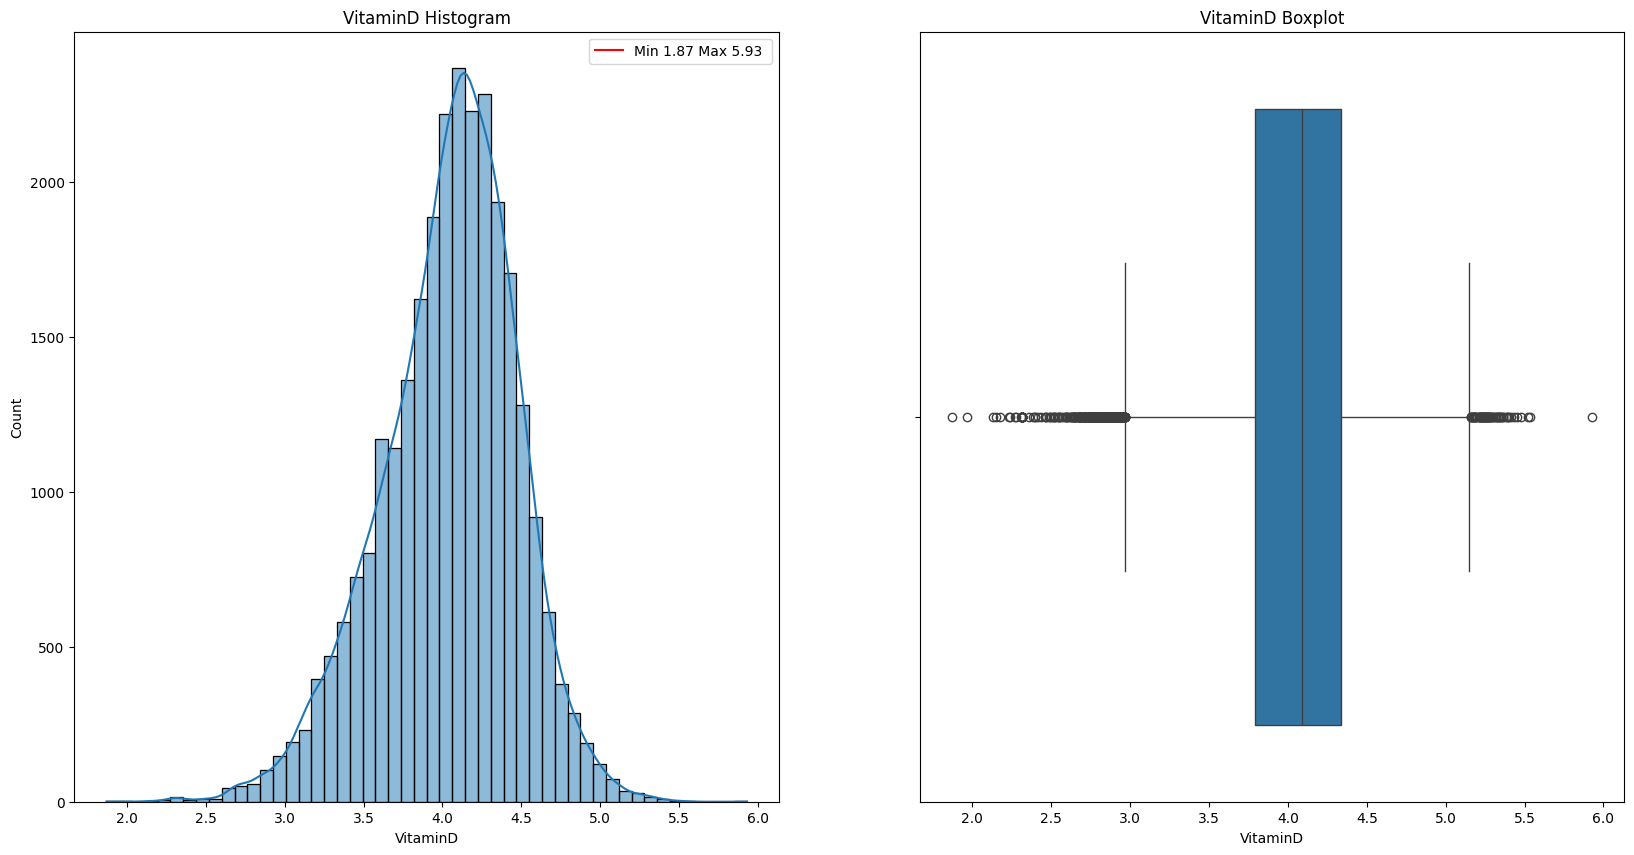

In [43]:
df_scaled = df_dq.copy()
df_scaled.drop(columns=[
                    'Gender', 'Race', 'FastingGlucose',
                    'TotalCholesterol', 'CreatinineUmol'
                ], inplace=True)
df_scaled = df_scaled.apply(lambda x: np.log1p(x))

for col in df_scaled.columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.plot([], [], label = f"Min {df_scaled[col].min():.2f} Max {df_scaled[col].max():.2f} ", color='red')
    plt.legend()
    plt.title(f"{col} Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f"{col} Boxplot")

    plt.show()

### Data quality

#### 1. Completeness

##### 1.1 Measure for each features

In [44]:
# Loop through each column and check for missing values for each column
def check_missing_ratio(df_check):
    ratio_completeness = []
    for column in df_check.columns:
        completeness_ratio = df_check[column].notnull().sum() / len(df_check)
        ratio_completeness.append(completeness_ratio)

    # Draw ratio
    plt.figure(figsize=(20, 10)) # type: ignore
    plt.title("Completeness Ratio")
    ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')

    for i, rec in enumerate(ax.patches):
        ax.text(
            rec.get_x() + rec.get_width(),
            rec.get_y() + rec.get_height()/2,
            f'{ratio_completeness[i]:.2%}',
        )

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_26084\2836042086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


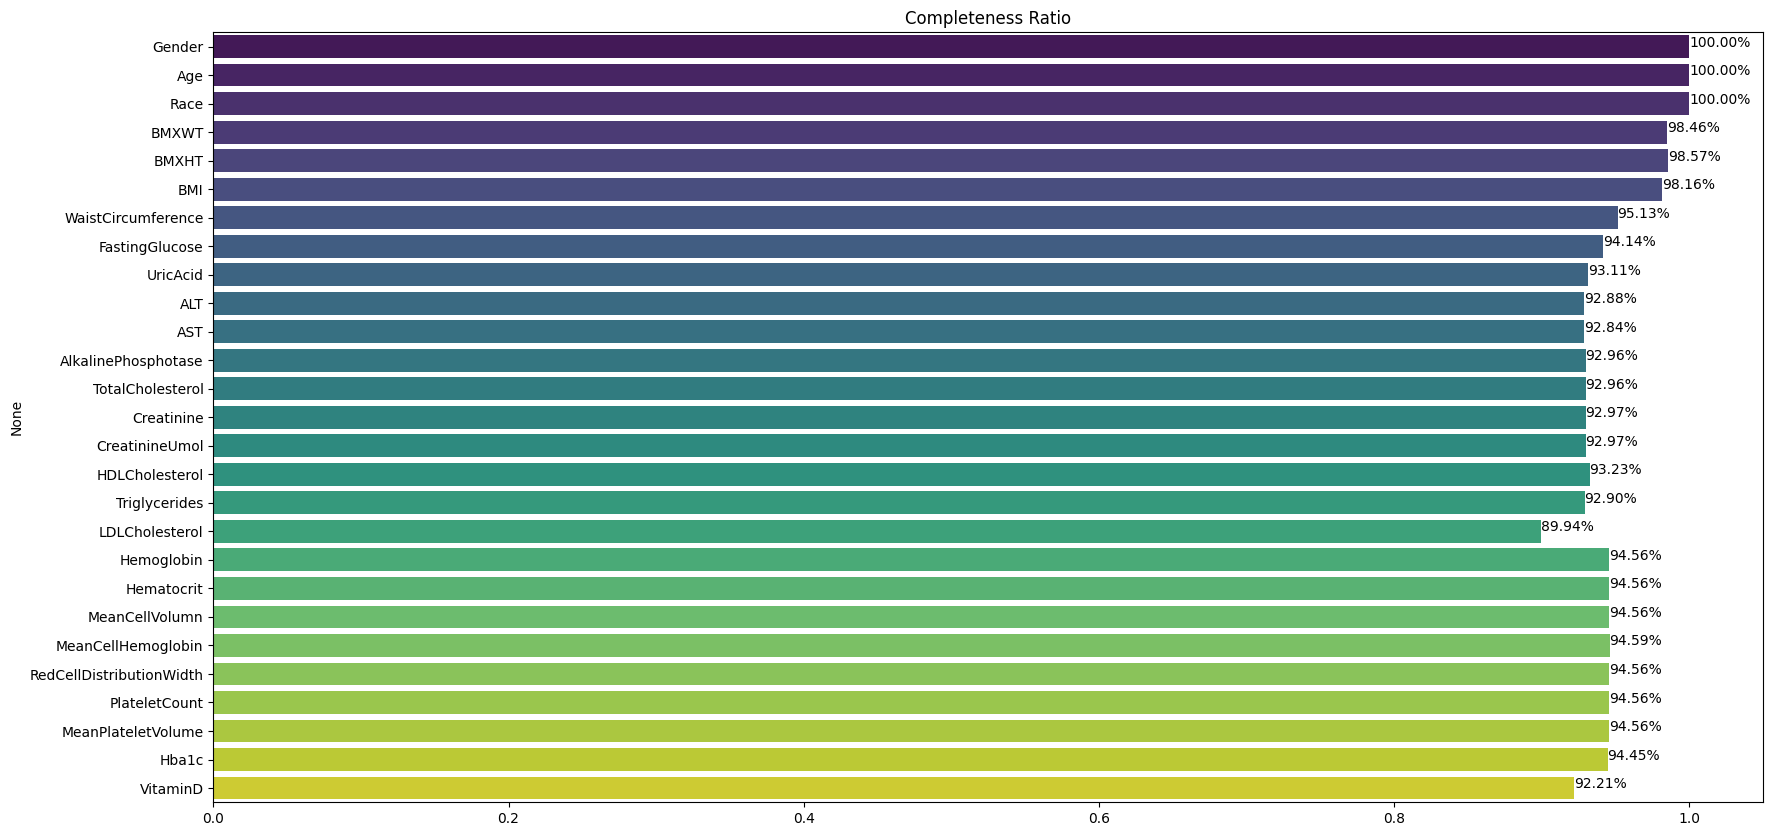

In [45]:
check_missing_ratio(df_dq)

##### 1.2 Measure for each record (row) and all dataset

In [46]:
missing_ratio_list = []

# Loop through each record (row) and cal missing ratio
for index, row in df_dq.iterrows():
    missing_ratio_row = row.isnull().sum()/ len(row)
    missing_ratio_list.append(missing_ratio_row)

# Cal average missing ratio for all dataset
ratio_dataset = np.mean(missing_ratio_list)
print(f"Average missing ratio for dataset: {ratio_dataset:.2%}")

Average missing ratio for dataset: 5.19%


#### 2. Accuracy

#### 3. Consistency

## 🔍 Kiểm tra các yếu tố ảnh hưởng đến **tính nhất quán** của dữ liệu

1. ✅ **Miền giá trị** *(đang thực hiện)*  
   → Đảm bảo các giá trị nằm trong một khoảng hợp lý.

2. ✅ **Dữ liệu không rỗng**  
   → Đã được kiểm tra ở phần đánh giá **tính đầy đủ**.

3. ✅ **Loại dữ liệu**  
   → Không phát hiện lỗi kiểu dữ liệu.

4. 🔄 **Ràng buộc logic** *(đang kiểm tra)*  
   → Đảm bảo các mối quan hệ giữa các cột dữ liệu là hợp lý.

5. ✅ **Tính duy nhất**  
   → Không có trường hợp **trùng lặp** giá trị không mong muốn.

6. 🔗 **Tính khóa ngoại**  
   → Cột `SEQN` được sử dụng như **khóa ngoại định danh** giữa các bảng dữ liệu.


##### 3.1 Check range value

In [65]:
# Create dict to convert rate to measure
measures_dict = {
    "BMI": { # kg/m^2
        "both":{
            "1": 18.4, # <18.4
            "2": 24.9, # 18.4 <= x < 24.9
            "3": 30, # 24.9 <= x < 30
            "4": 30 # >= 30
        }
    },

    "WaistCircumference": {  # cm
        "male":{
            "1": 94, # <94
            "2": 102, # 94 <= x < 102
            "3": 102, # >= 102
        }, 
        "female": {
            "1": 80, # <80
            "2": 88, # 80 <= x < 88
            "3": 88 # >= 88
        }
    },

    "HDLCholesterol": { # mg/dl
        "both":{
            "1": 40, # <40
            "2": 60, # 40 <= x < 60
            "3": 60 # >= 60
        }  
    },

    "Triglycerides":{ # mg/dl
        "both":{
            "1": 150, # <150
            "2": 200, # 150 <= x < 200
            "3": 200, # >= 200
        }
    },

    "LDLCholesterol": { # mg/dl
        "both":{
            "1": 100, # <100
            "2": 160, # 100 <= x < 160
            "3": 160 # >= 160
        }
    },

    "Hba1c": { # %
        "both":{
            "1": 5.7, # <5.7
            "2": 6.5, # 5.7 <= x < 6.5
            "3": 6.5 # >= 6.5
        }
    },

    "ALT": { # U/L
        "male": {
            "1": 0, # <0
            "2": 41, # 0 <= x < 41
            "3": 41 # >= 41
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 31
        }
    },

    "AST": {  # U/L
        "male": {
            "1": 0, # <0
            "2": 38, # 0 <= x < 38
            "3": 38 # >= 40
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 32
        }
    },

    "AlkalinePhosphotase":{ # U/L
        "male": {
            "1": 40, # < 40
            "2": 130, # 40 <= x < 130
            "3": 130 # >= 130
        },
        "female":{
            "1": 35, # < 35
            "2": 105, # 35 <= x < 105
            "3": 105 # >= 105
        }
    },

    "Creatinine":{  # mg/dl
        "male": {
            "1": 0.67, # <0.67
            "2": 1.18, # 0.67 <= x < 1.18,
            "3": 1.18 # >= 1.18
        },
        "female":{
            "1": 0.51, # < 0.51
            "2": 0.96, # 0.51 <= x < 0.96
            "3": 0.96 # >= 0.96
        }
    },
    
    "UricAcid": { # mng/dl
        "male": {
            "1": 3.4, # <3.4
            "2": 7.1, # 3.4 <= x < 7.1
            "3": 7.1 # >= 7.1
        }, 

        "female": {
            "1": 2.4, # < 2.4
            "2": 5.8, # 2.4 <= x < 5.8
            "3": 5.8 # >= 5.8
        }
    }
}

In [66]:
col_blood_dict = {
    "Hemoglobin": {
        "min": 10.7,
        "max": 17.1
    },
    "Hematocrit": {
        "min": 32.1,
        "max": 50.9
    },
    "MeanCellVolumn": {
        "min": 68.2,
        "max": 102.7
    },
    "MeanCellHemoglobin": {
        "min": 22.3,
        "max": 35
    },
    "RedCellDistributionWidth": {
        "min": 11.4,
        "max": 16.2
    },
    "PlateletCount": {
        "min": 155,
        "max": 547
    },
    "MeanPlateletVolume": {
        "min": 6.1,
        "max": 10.2
    }
}

In [50]:
'''
   Strategy to check outlier:
    1. Use boxplot to visualize outliers
    2. Use Z-score to detect outliers
      2.1 If Z-score > 3 and greater than max normal range value => outlier
    3. Measure Consistency ratio
'''
          
# Check for each column first 
for col in df_dq.columns:
    if col in measures_dict.keys():
        # Calculate Z-score of column
        z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
        max_value = 0
        min_value = 0
        if measures_dict[col].get("both"):
          # get max value and min value
          max_value = max(measures_dict[col]["both"].values())
          min_value = min(measures_dict[col]["both"].values())

          # check outlier
          outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))
          
          print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
        else:
          num_invalid_range = 0

          if measures_dict[col].get("female"):
            # get max value and min value
            max_value = max(measures_dict[col]["female"].values())
            min_value = min(measures_dict[col]["female"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 2)

            num_invalid_range += outlier_condition.sum()

          if measures_dict[col].get("male"):
            # get max value and min value
            max_value = max(measures_dict[col]["male"].values())
            min_value = min(measures_dict[col]["male"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 1)

            num_invalid_range += outlier_condition.sum()
            
          print(f"Ratio of outlier for {col}: {num_invalid_range/len(df_dq):.2%}")
    elif col in col_blood_dict:
        # Check outlier for blood columns
        z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
        max_value = col_blood_dict[col].get("max")
        min_value = col_blood_dict[col].get("min")

        # check outlier
        outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))

        print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
      

Ratio of outlier for BMI: 1.15%
Ratio of outlier for WaistCircumference: 0.54%
Ratio of outlier for UricAcid: 0.08%
Ratio of outlier for ALT: 0.84%
Ratio of outlier for AST: 0.71%
Ratio of outlier for AlkalinePhosphotase: 2.66%
Ratio of outlier for Creatinine: 0.62%
Ratio of outlier for HDLCholesterol: 0.93%
Ratio of outlier for Triglycerides: 0.95%
Ratio of outlier for LDLCholesterol: 0.66%
Ratio of outlier for Hemoglobin: 0.69%
Ratio of outlier for Hematocrit: 0.48%
Ratio of outlier for MeanCellVolumn: 0.96%
Ratio of outlier for MeanCellHemoglobin: 0.15%
Ratio of outlier for RedCellDistributionWidth: 1.66%
Ratio of outlier for PlateletCount: 0.21%
Ratio of outlier for MeanPlateletVolume: 0.68%
Ratio of outlier for Hba1c: 2.23%


In [51]:
list_col = df_dq.columns.tolist()
mean_col = [df_dq[col].mean() for col in list_col]
std_col = [df_dq[col].std() for col in list_col]
list_ratio_invalid_row = []

# Check for each record (row)
for i, row in df_dq.iterrows():

    num_valid_cell = 0
    num_invalid_range = 0

    for index, col in enumerate(list_col):
        if col in measures_dict.keys():

            num_valid_cell += 1 # count valid cell

            z_score_cell = (row[col] - mean_col[index]) / std_col[index]

            if measures_dict[col].get("both"):
                # get max value and min value
                max_value = max(measures_dict[col]["both"].values())
                min_value = min(measures_dict[col]["both"].values())

                # check outlier
                outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value))
                
                num_invalid_range += 1 if outlier_condition else 0
            else:

                if measures_dict[col].get("female"):
                    # get max value and min value
                    max_value = max(measures_dict[col]["female"].values())
                    min_value = min(measures_dict[col]["female"].values())

                    # check outlier
                    outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value)) & (row["Gender"] == 2)

                    num_invalid_range += 1 if outlier_condition else 0
                if measures_dict[col].get("male"):
                    # get max value and min value
                    max_value = max(measures_dict[col]["male"].values())
                    min_value = min(measures_dict[col]["male"].values())

                    # check outlier
                    outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value)) & (row["Gender"] == 1)

                    num_invalid_range += 1 if outlier_condition else 0
        elif col in col_blood_dict:
            num_valid_cell += 1

            max_value = col_blood_dict[col].get("max")
            min_value = col_blood_dict[col].get("min")

            outlier_condition = (abs(z_score_cell) > 3) & ((row[col] > max_value) | (row[col] < min_value))
            num_invalid_range += 1 if outlier_condition else 0
                    
    ratio_invalid_row = num_invalid_range / num_valid_cell
    list_ratio_invalid_row.append(ratio_invalid_row)
    
# Cal average ratio for all dataset
ratio_dataset = np.mean(list_ratio_invalid_row)
print(f"Average ratio of invalid range for dataset: {ratio_dataset:.2%}")                

Average ratio of invalid range for dataset: 0.64%


##### 3.2 Check logical data

In [52]:
# 4. Check data has type numeric but has negative values - check for each column first
for col in df_dq.columns:
    print(f"Columns: {col} has percentage of negative values: {df_dq[col][df_dq[col] < 0].count() / len(df_dq) * 100:.2f}%")

# Check for each row however columns have not negative values so row is not needed

Columns: Gender has percentage of negative values: 0.00%
Columns: Age has percentage of negative values: 0.00%
Columns: Race has percentage of negative values: 0.00%
Columns: BMXWT has percentage of negative values: 0.00%
Columns: BMXHT has percentage of negative values: 0.00%
Columns: BMI has percentage of negative values: 0.00%
Columns: WaistCircumference has percentage of negative values: 0.00%
Columns: FastingGlucose has percentage of negative values: 0.00%
Columns: UricAcid has percentage of negative values: 0.00%
Columns: ALT has percentage of negative values: 0.00%
Columns: AST has percentage of negative values: 0.00%
Columns: AlkalinePhosphotase has percentage of negative values: 0.00%
Columns: TotalCholesterol has percentage of negative values: 0.00%
Columns: Creatinine has percentage of negative values: 0.00%
Columns: CreatinineUmol has percentage of negative values: 0.00%
Columns: HDLCholesterol has percentage of negative values: 0.00%
Columns: Triglycerides has percentage o

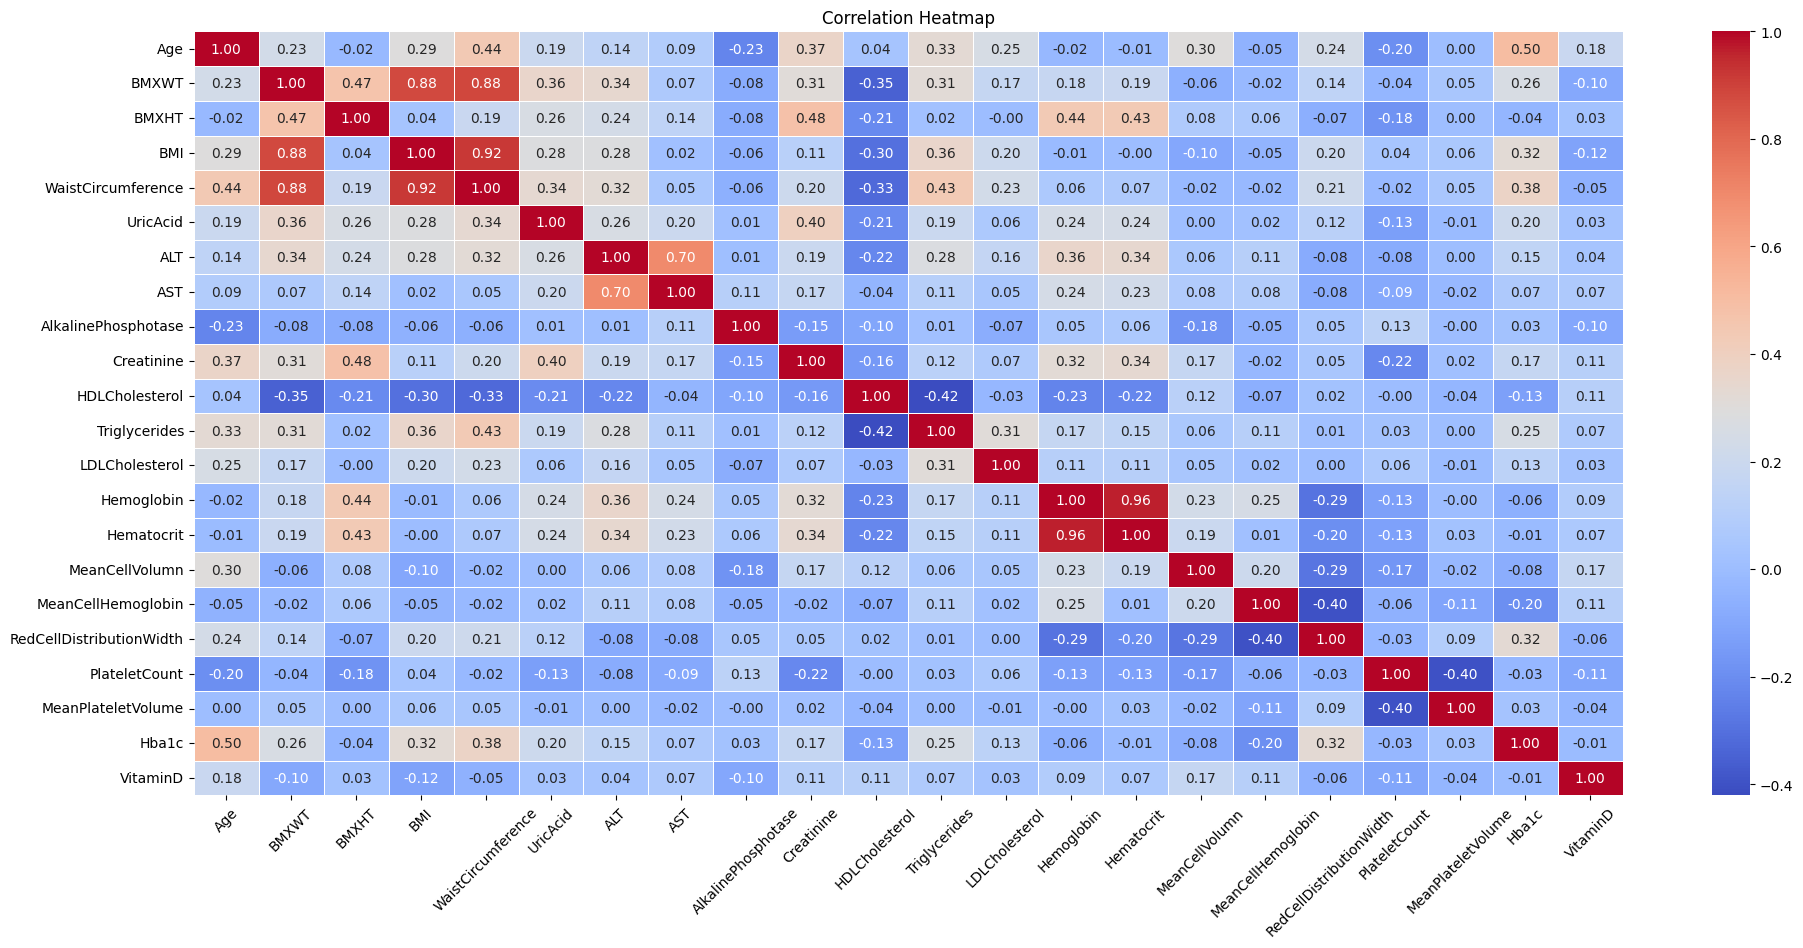

In [53]:
# drop columns that are not needed to measure correlation
df_dq_numerics = df_dq.drop(columns=[
    "Gender", "Race", "FastingGlucose",
    "TotalCholesterol", "CreatinineUmol"
])

# Check consistency between columns with spearman correlation
correlation_matrix = df_dq_numerics.corr(method = "spearman")

plt.figure(figsize=(20, 10))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### ✅ Conclusion

1. 🔗 **BMI** strongly correlates with **Waist Circumference**  
2. 🧪 **ALT** strongly correlates with **AST**   
3. 🩸 **HbA1c** strongly correlates with **Age** and **Waist Circumference**  
4. 🧬 **Hemoglobin** strongly correlates with **Hematocrit**  
5. 🧁 **Triglycerides** strongly correlate with **LDL**



##### 3.3 Check duplicated value

In [54]:
# 5. Check row duplicated
df_dup = df[df.duplicated(keep=False)]
print(f"Number of duplicated rows: {len(df_dup)}")
print("Percent of duplicated rows:", len(df_dup) / len(df) * 100, "%")

Number of duplicated rows: 0
Percent of duplicated rows: 0.0 %


#### 4. Timelineness

In [ ]:
#done

### Data processing

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_26084\220923147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='viridis')


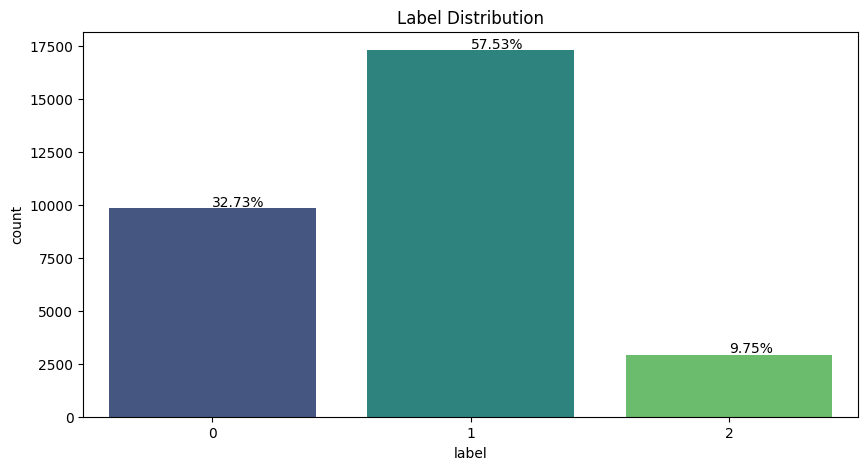

In [55]:
# Create column label
df['label'] = df['VitaminD'].apply(lambda x: 0 if  x < 50  else 1 if (x >= 50 and x < 125) else 2)

# Draw label distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label', data=df, palette='viridis')
plt.title('Label Distribution')
for i, rec in enumerate(ax.patches):
    ax.text(
        rec.get_x() + rec.get_width()/2,
        rec.get_height() + 100,
        f'{rec.get_height()/len(df)*100:.2f}%',
    )
plt.show()

#### 1. Missing value

In [56]:
# Drop columns not used fully
cols_drop = [
    "SEQN", "HBsAg"
]

df.drop(columns=cols_drop, inplace=True)

In [57]:
# drop row has null vitamin D value
df.dropna(subset=['VitaminD'],inplace=True)

df['label'].value_counts()

label
1    17295
0     9839
2      588
Name: count, dtype: int64

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_26084\2836042086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


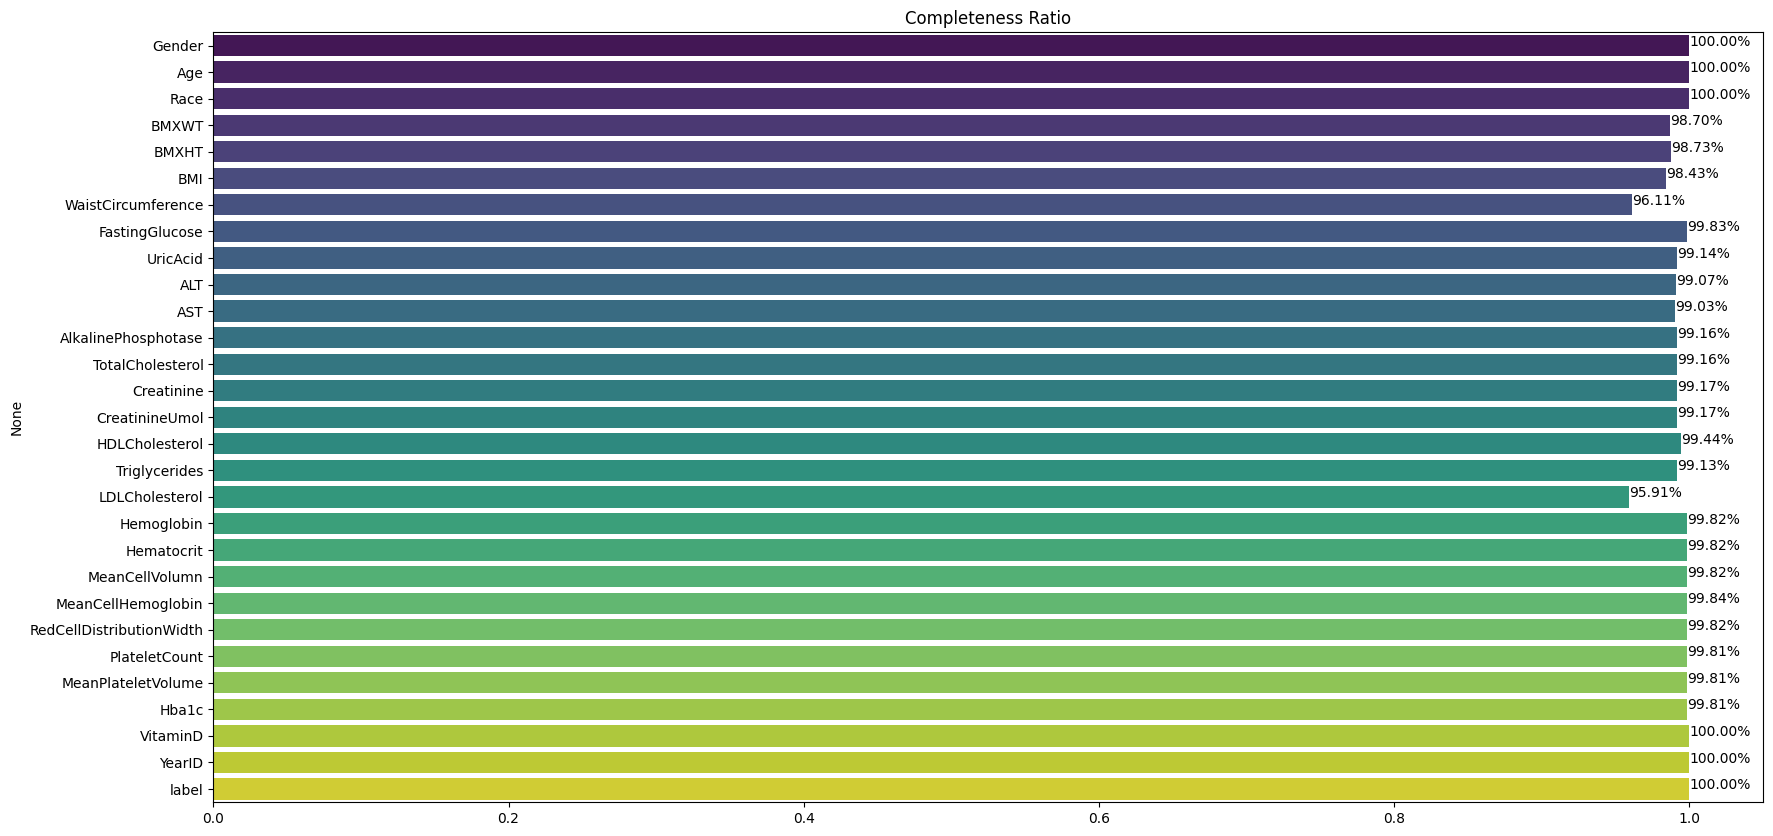

In [58]:
check_missing_ratio(df)

In [36]:
# List all columns except 'VitaminD'
cols_to_fill = [col for col in df.columns if col not in ['VitaminD','HbsAg','YearID']]

# Fill missing values in those columns with median
for col in cols_to_fill:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Check missing after filling
print(df[cols_to_fill].isna().sum())
print(f"VitaminD missing count: {df['VitaminD'].isna().sum()}")

Gender                      0
Age                         0
Race                        0
BMXWT                       0
BMXHT                       0
BMI                         0
WaistCircumference          0
FastingGlucose              0
UricAcid                    0
ALT                         0
AST                         0
AlkalinePhosphotase         0
TotalCholesterol            0
Creatinine                  0
CreatinineUmol              0
HDLCholesterol              0
Triglycerides               0
LDLCholesterol              0
Hemoglobin                  0
Hematocrit                  0
MeanCellVolumn              0
MeanCellHemoglobin          0
RedCellDistributionWidth    0
PlateletCount               0
MeanPlateletVolume          0
Hba1c                       0
label                       0
dtype: int64
VitaminD missing count: 0


/tmp/ipykernel_60532/3245006356.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_60532/3245006356.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

/tmp/ipykernel_60532/2836042086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


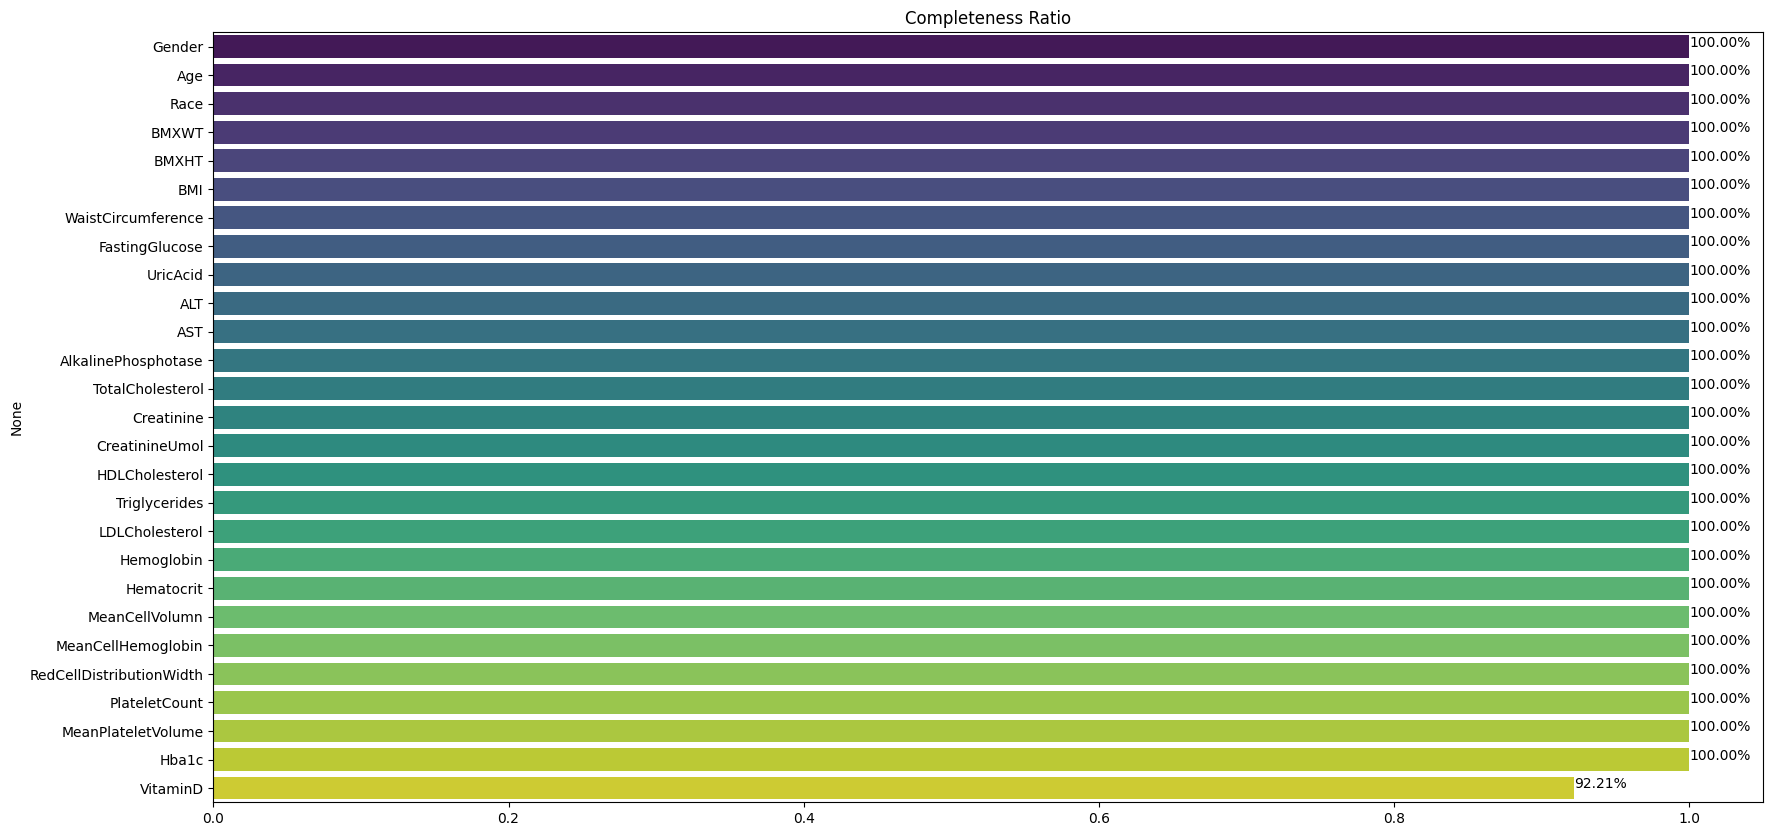

In [ ]:
check_missing_ratio(df)

In [33]:
df_dq.dropna(inplace=True)

In [59]:
df.columns

Index(['Gender', 'Age', 'Race', 'BMXWT', 'BMXHT', 'BMI', 'WaistCircumference',
       'FastingGlucose', 'UricAcid', 'ALT', 'AST', 'AlkalinePhosphotase',
       'TotalCholesterol', 'Creatinine', 'CreatinineUmol', 'HDLCholesterol',
       'Triglycerides', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'YearID',
       'label'],
      dtype='object')

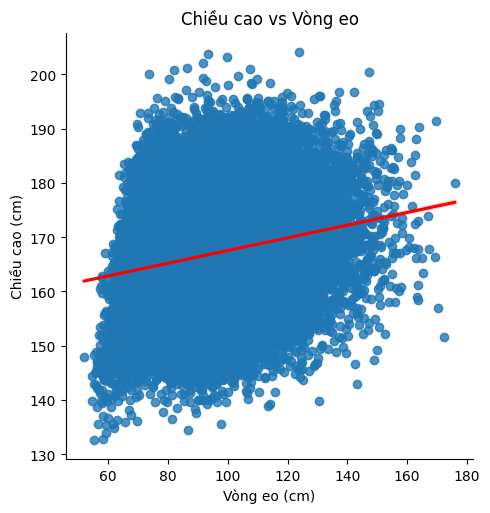

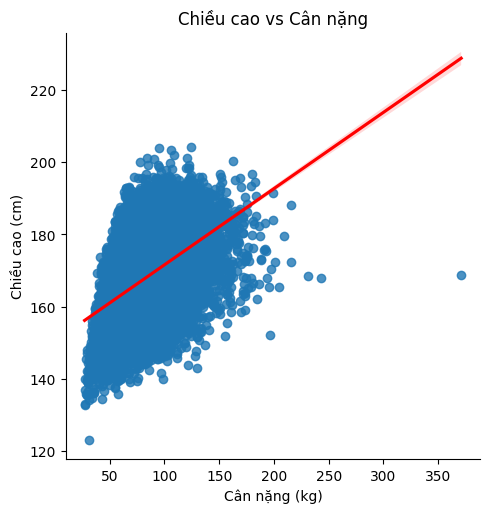

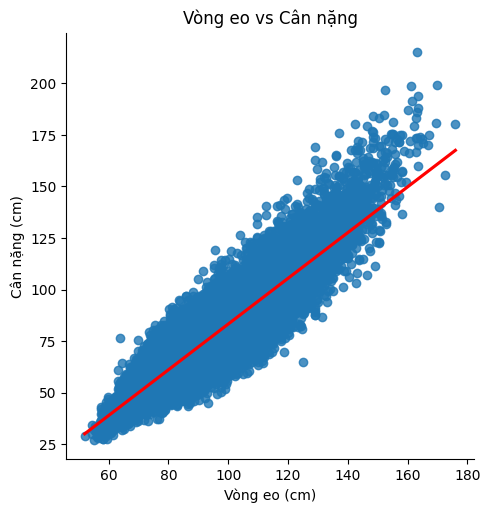

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ 1: Chiều cao vs Vòng eo
sns.lmplot(x='WaistCircumference', y='BMXHT', data=df, line_kws={'color': 'red'})
plt.title('Chiều cao vs Vòng eo')
plt.xlabel('Vòng eo (cm)')
plt.ylabel('Chiều cao (cm)')
plt.show()

# Biểu đồ 2: Chiều cao vs Cân nặng
sns.lmplot(x='BMXWT', y='BMXHT', data=df, line_kws={'color': 'red'})
plt.title('Chiều cao vs Cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Chiều cao (cm)')
plt.show()

# Biểu đồ 2: Chiều cao vs Cân nặng
sns.lmplot(x='WaistCircumference', y='BMXWT', data=df, line_kws={'color': 'red'})
plt.title('Vòng eo vs Cân nặng')
plt.xlabel('Vòng eo (cm)')
plt.ylabel('Cân nặng (cm)')
plt.show()


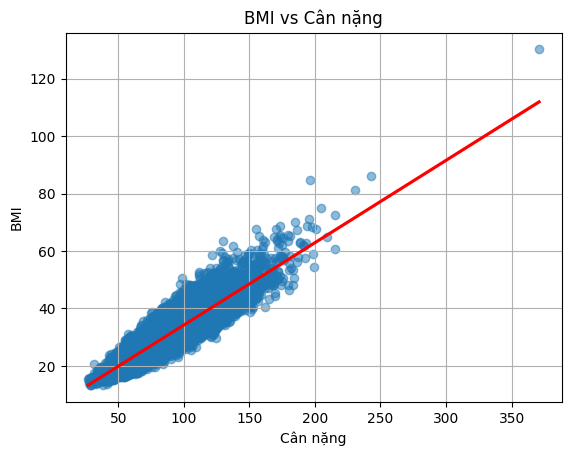

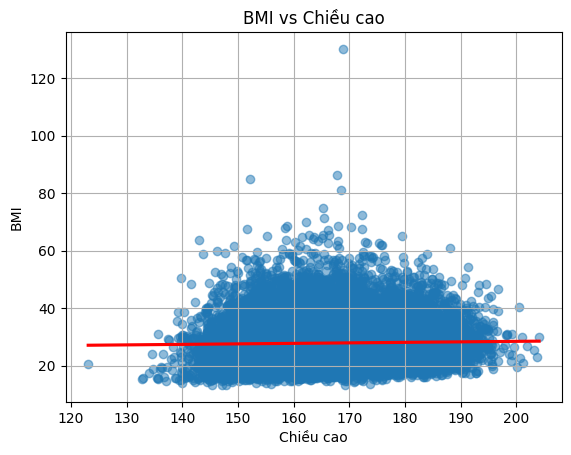

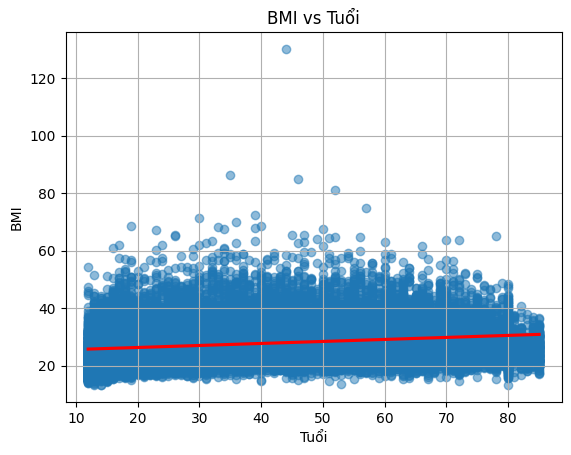

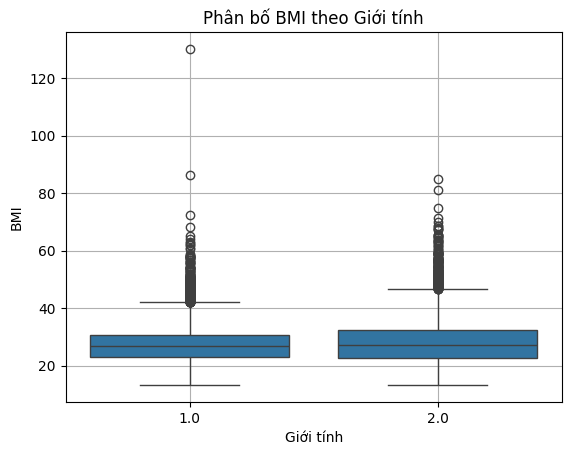

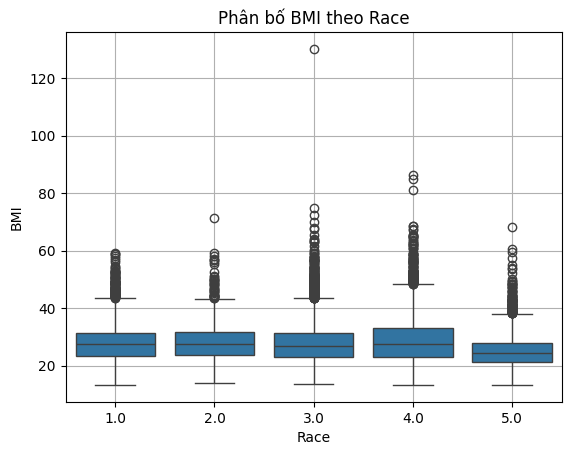

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vòng eo vs BMI
sns.regplot(x='BMXWT', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('BMI vs Cân nặng')
plt.xlabel('Cân nặng')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Vòng eo vs BMI
sns.regplot(x='BMXHT', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('BMI vs Chiều cao')
plt.xlabel('Chiều cao')
plt.ylabel('BMI')
plt.grid(True)
plt.show()
# Tuổi vs BMI
if 'Age' in df.columns:
    sns.regplot(x='Age', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('BMI vs Tuổi')
    plt.xlabel('Tuổi')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

# Giới tính vs BMI
if 'Gender' in df.columns:
    sns.boxplot(x='Gender', y='BMI', data=df)
    plt.title('Phân bố BMI theo Giới tính')
    plt.xlabel('Giới tính')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

# Giới tính vs BMI
if 'Race' in df.columns:
    sns.boxplot(x='Race', y='BMI', data=df)
    plt.title('Phân bố BMI theo Race')
    plt.xlabel('Race')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

Danh sách cân nặng của những người thiếu BMI nhưng có cân nặng:
48       50.2
107      43.8
232      40.3
250      72.9
258      75.3
         ... 
24563    66.9
24935    78.3
27665    89.5
27807    79.5
28333    94.0
Name: BMXWT, Length: 92, dtype: float64


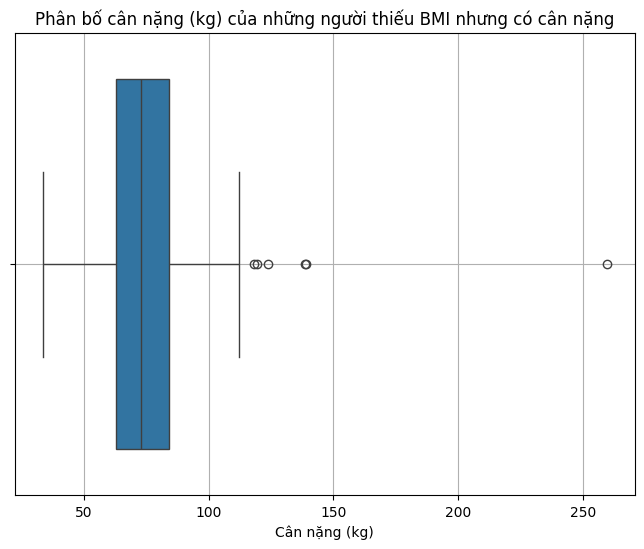

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy cân nặng của những người thiếu BMI nhưng có cân nặng
missing_bmi_weights = df_dq.loc[pd.isna(df_dq['BMI']) & pd.notna(df_dq['BMXWT']), 'BMXWT']

# In ra danh sách cân nặng
print("Danh sách cân nặng của những người thiếu BMI nhưng có cân nặng:")
print(missing_bmi_weights)

# Vẽ boxplot cho cân nặng nhóm này
plt.figure(figsize=(8, 6))
sns.boxplot(x=missing_bmi_weights)
plt.title('Phân bố cân nặng (kg) của những người thiếu BMI nhưng có cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.grid(True)
plt.show()

In [63]:
# Tính Q1, Q3 và IQR
Q1 = missing_bmi_weights.quantile(0.25)
Q3 = missing_bmi_weights.quantile(0.75)
IQR = Q3 - Q1

# Tính ngưỡng dưới và ngưỡng trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1 (25%): {Q1}')
print(f'Q3 (75%): {Q3}')
print(f'IQR: {IQR}')
print(f'Ngưỡng dưới (Lower bound): {lower_bound}')
print(f'Ngưỡng trên (Upper bound): {upper_bound}')

Q1 (25%): 62.975
Q3 (75%): 84.25
IQR: 21.275
Ngưỡng dưới (Lower bound): 31.062500000000004
Ngưỡng trên (Upper bound): 116.1625


Phân bố chủng tộc trong nhóm thiếu BMI nhưng có cân nặng:
Mexican American: 13
Other Hispanic: 6
Non-Hispanic White: 57
Non-Hispanic Black: 13
Other/Multi-Racial: 3


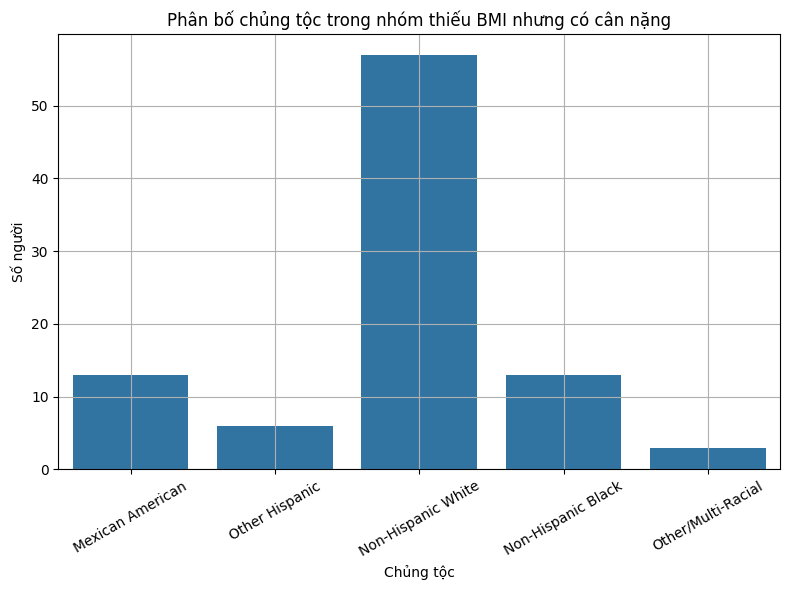

In [64]:
# Lọc những người thiếu BMI nhưng có cân nặng
missing_bmi_race = df_dq.loc[
    pd.isna(df_dq['BMI']) & pd.notna(df_dq['BMXWT']),
    'Race'
]

# Đếm số lượng theo từng chủng tộc
race_counts = missing_bmi_race.value_counts().sort_index()

# Map mã số sang tên hiển thị
race_labels = {
    1: 'Mexican American',
    2: 'Other Hispanic',
    3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black',
    5: 'Other/Multi-Racial'
}

# In kết quả
print("Phân bố chủng tộc trong nhóm thiếu BMI nhưng có cân nặng:")
for code, count in race_counts.items():
    label = race_labels.get(code, f'Unknown ({code})')
    print(f"{label}: {count}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x=[race_labels.get(i, str(i)) for i in race_counts.index], y=race_counts.values)
plt.title('Phân bố chủng tộc trong nhóm thiếu BMI nhưng có cân nặng')
plt.ylabel('Số người')
plt.xlabel('Chủng tộc')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
df.columns

Index(['Gender', 'Age', 'Race', 'BMXWT', 'BMXHT', 'BMI', 'WaistCircumference',
       'FastingGlucose', 'UricAcid', 'ALT', 'AST', 'AlkalinePhosphotase',
       'TotalCholesterol', 'Creatinine', 'CreatinineUmol', 'HDLCholesterol',
       'Triglycerides', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'YearID',
       'label'],
      dtype='object')

In [84]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Filter rows for training
df_train = df_dq[['BMI','UricAcid', 'Hba1c', 'BMXWT']].dropna()

# Lọc BMI trong khoảng 0–30 và cân nặng hợp lý (31–116 kg)
df_train = df_train[
    (df_train['BMI'] >= 0) & 
    (df_train['BMI'] <= 30) &
    (df_train['BMXWT'] >= 31) & 
    (df_train['BMXWT'] <= 116)
]

# Step 2: Input (X) và target (y)
X_train = df_train[['UricAcid', 'Hba1c', 'BMXWT']]
y_train = df_train['BMI']

# Step 3: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Đánh giá MSE
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 5: Predict missing BMI
df_predict = df[
    df['BMI'].isnull() &
    df[['BMXWT', 'UricAcid', 'Hba1c', 'BMXWT']].notnull().all(axis=1) &
    (df['BMXWT'] >= 31) &
    (df['BMXWT'] <= 116)
]

# Step 6: Fill missing BMI
if not df_predict.empty:
    predicted_bmi = model.predict(df_predict[['UricAcid', 'Hba1c', 'BMXWT']])
    df.loc[df_predict.index, 'BMI'] = predicted_bmi
    print(f"Filled {len(df_predict)} missing BMI values.")
else:
    print("No eligible missing BMI values to fill.")



Mean Squared Error (MSE): 4.6037
No eligible missing BMI values to fill.


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Tạo tập huấn luyện
df_waist_train = df[['WaistCircumference', 'BMXWT']].dropna()

# Giới hạn giá trị thực tế
df_waist_train = df_waist_train[
    (df_waist_train['WaistCircumference'] >= 40) & (df_waist_train['WaistCircumference'] <= 200) &
    (df_waist_train['BMXWT'] >= 31) & (df_waist_train['BMXWT'] <= 116)
]

# 2. Input và target
X_waist = df_waist_train[['BMXWT']]
y_waist = df_waist_train['WaistCircumference']

# 3. Huấn luyện model
waist_model = LinearRegression()
waist_model.fit(X_waist, y_waist)

# 4. Đánh giá model
y_waist_pred = waist_model.predict(X_waist)
mse_waist = mean_squared_error(y_waist, y_waist_pred)
print(f"Waist prediction MSE: {mse_waist:.2f}")

# 5. Dự đoán vòng eo cho người thiếu vòng eo nhưng có đủ thông tin khác
df_waist_missing = df[
    df['WaistCircumference'].isnull() &
    df[['BMXWT']].notnull().all(axis=1)
]

# 6. Dự đoán và điền vòng eo
if not df_waist_missing.empty:
    waist_predictions = waist_model.predict(df_waist_missing[['BMXWT']])
    df.loc[df_waist_missing.index, 'WaistCircumference'] = waist_predictions
    print(f"Đã điền {len(df_waist_missing)} giá trị vòng eo bị thiếu.")
else:
    print("Không có dòng nào đủ điều kiện để dự đoán vòng eo.")


Waist prediction MSE: 56.79
Đã điền 106 giá trị vòng eo bị thiếu.


/tmp/ipykernel_59368/2836042086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


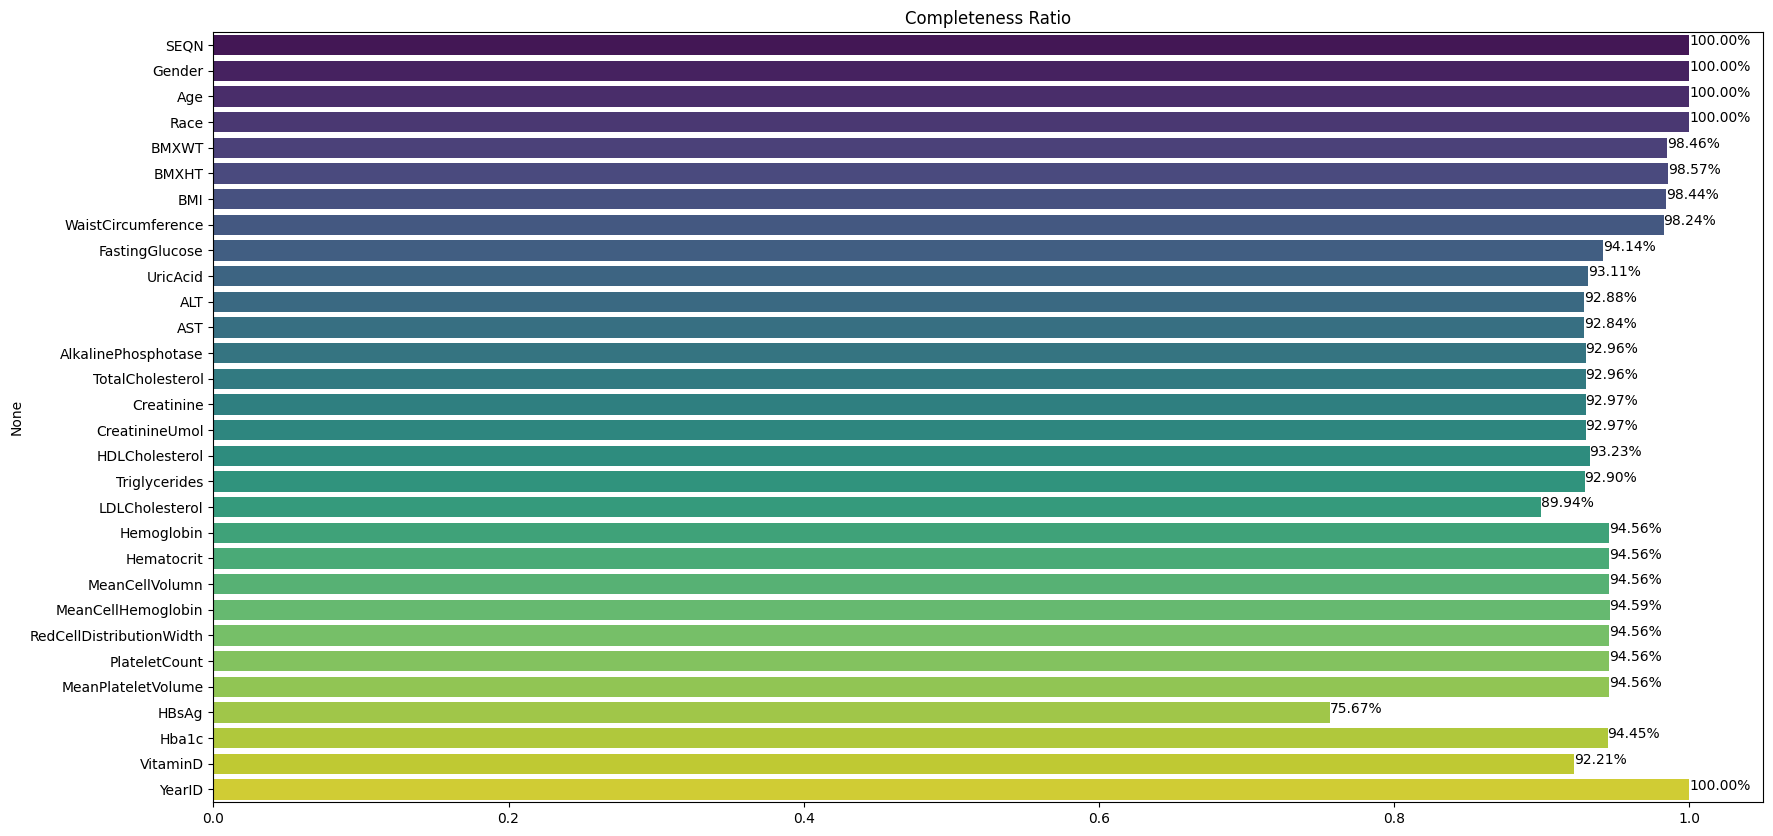

In [12]:
check_missing_ratio(df)

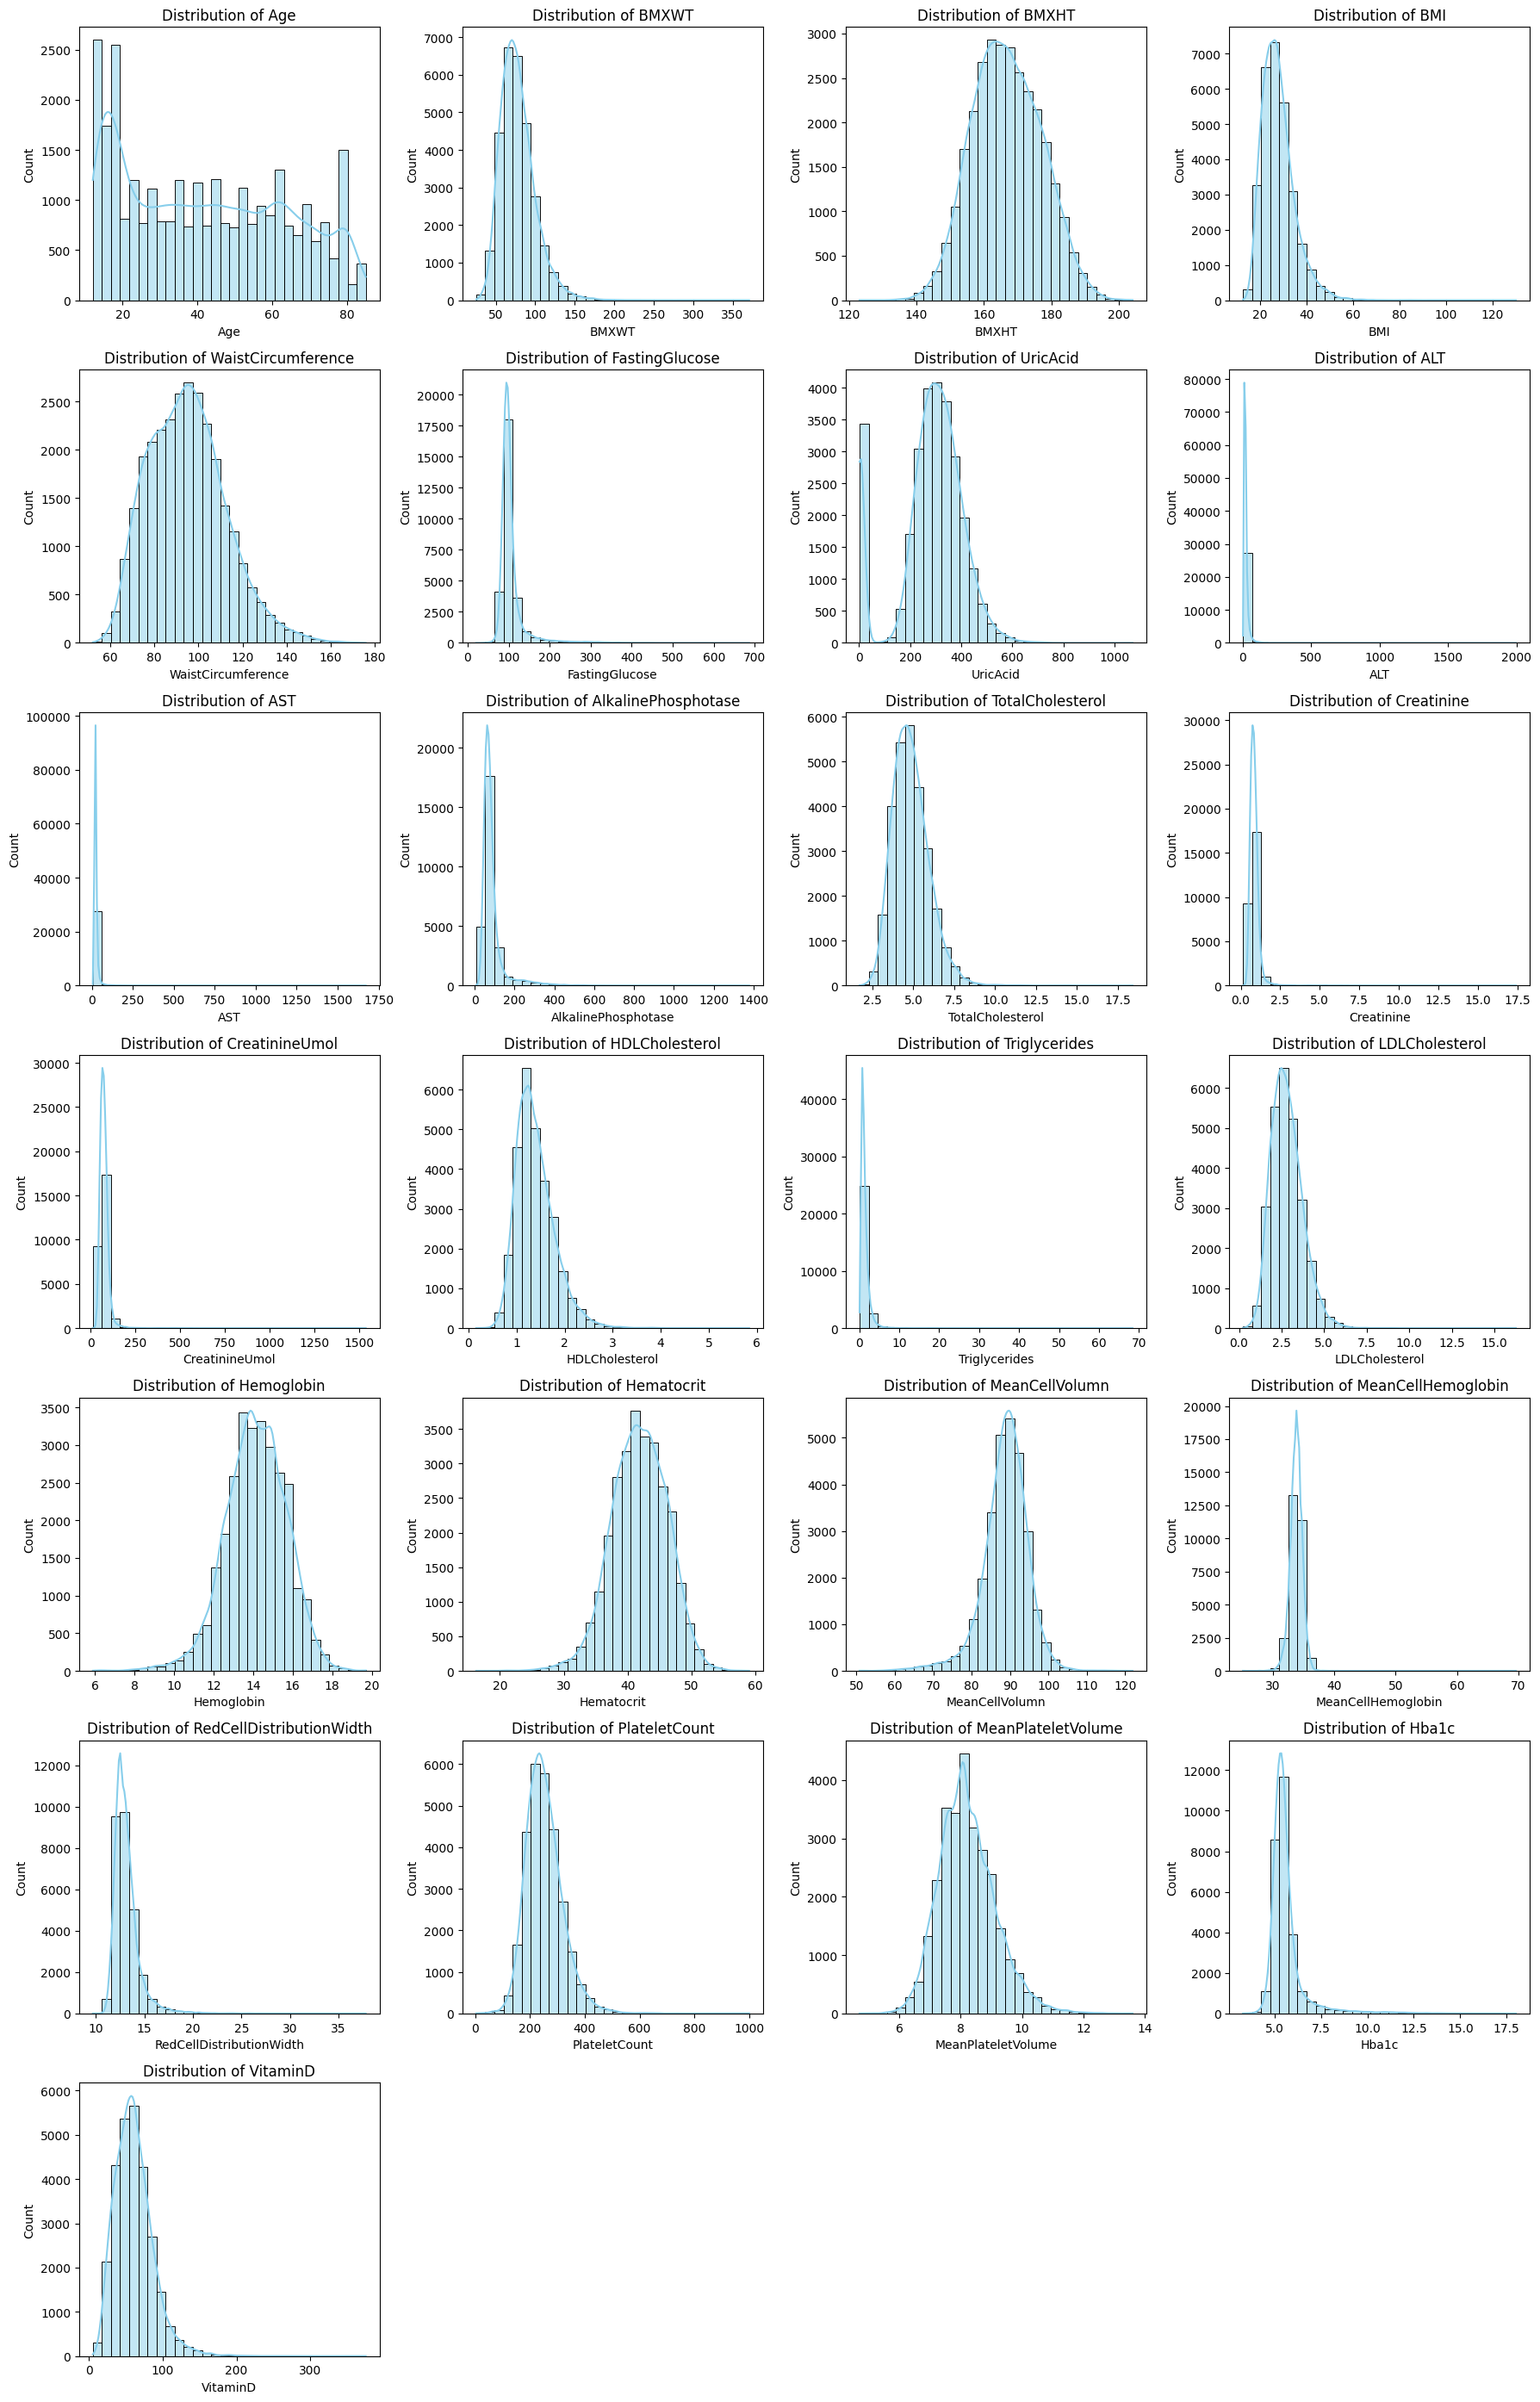

/tmp/ipykernel_60532/2050780537.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_dq, x=col, palette='Set2')
/tmp/ipykernel_60532/2050780537.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_dq, x=col, palette='Set2')


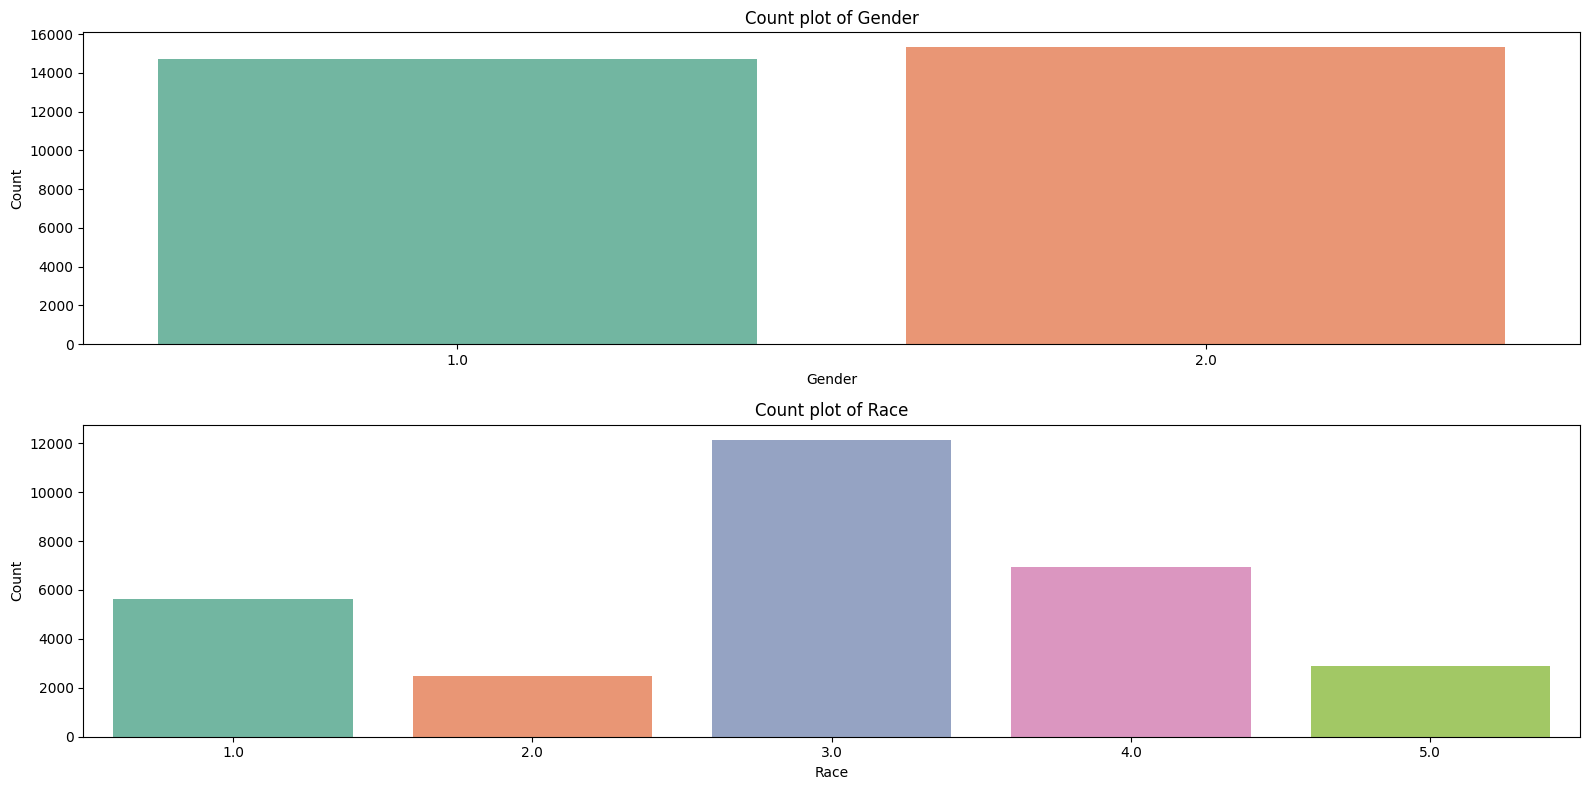

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns list you gave
cols = ['Gender', 'Age', 'Race', 'BMXWT', 'BMXHT', 'BMI',
       'WaistCircumference', 'FastingGlucose', 'UricAcid', 'ALT', 'AST',
       'AlkalinePhosphotase', 'TotalCholesterol', 'Creatinine',
       'CreatinineUmol', 'HDLCholesterol', 'Triglycerides', 'LDLCholesterol',
       'Hemoglobin', 'Hematocrit', 'MeanCellVolumn', 'MeanCellHemoglobin',
       'RedCellDistributionWidth', 'PlateletCount', 'MeanPlateletVolume',
       'Hba1c', 'VitaminD']

# Separate categorical and numerical columns for different plots
categorical_cols = ['Gender', 'Race']
numerical_cols = [col for col in cols if col not in categorical_cols + ['SEQN']]

# Plotting
plt.figure(figsize=(18, 4 * ((len(numerical_cols) // 4) + 1)))

# Plot numerical features: histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 4) + 1, 4, i)
    sns.histplot(df_dq[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot categorical features: count plots
plt.figure(figsize=(16, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df_dq, x=col, palette='Set2')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [92]:
print(f"Regression Coef: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Regression Coef: 0.3596
Intercept: -6.3985


In [85]:
df.columns

Index(['Gender', 'Age', 'Race', 'BMXWT', 'BMXHT', 'BMI', 'WaistCircumference',
       'FastingGlucose', 'UricAcid', 'ALT', 'AST', 'AlkalinePhosphotase',
       'TotalCholesterol', 'Creatinine', 'CreatinineUmol', 'HDLCholesterol',
       'Triglycerides', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'YearID',
       'label'],
      dtype='object')

In [24]:
# Imputation LDL cholesterol
for index, col in enumerate(['LDLCholesterol', 'HDLCholesterol', 'Triglycerides']):
    for i, row in df.iterrows():
        if pd.isnull(row[col]):
            TotalCholesterol = row['TotalCholesterol']
            a = ''
            b = ''
            c = 0
            if col == 'LDLCholesterol':
                a = row['HDLCholesterol']
                b = row['Triglycerides']
            elif col == 'HDLCholesterol':
                a = row['LDLCholesterol']
                b = row['Triglycerides']
            else:
                a = row['LDLCholesterol']
                b = row['HDLCholesterol']
            if pd.isnull(TotalCholesterol) or pd.isnull(a) or pd.isnull(b):
                    continue
            
            # Calculate LDL cholesterol using Friedewald formula
            if col == 'Triglycerides':
                c = (TotalCholesterol - a - b)*5
            else:
                c = TotalCholesterol - a - b/5
            df.loc[i, col] = c

C:\Users\TGDD\AppData\Local\Temp\ipykernel_17212\3172115332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


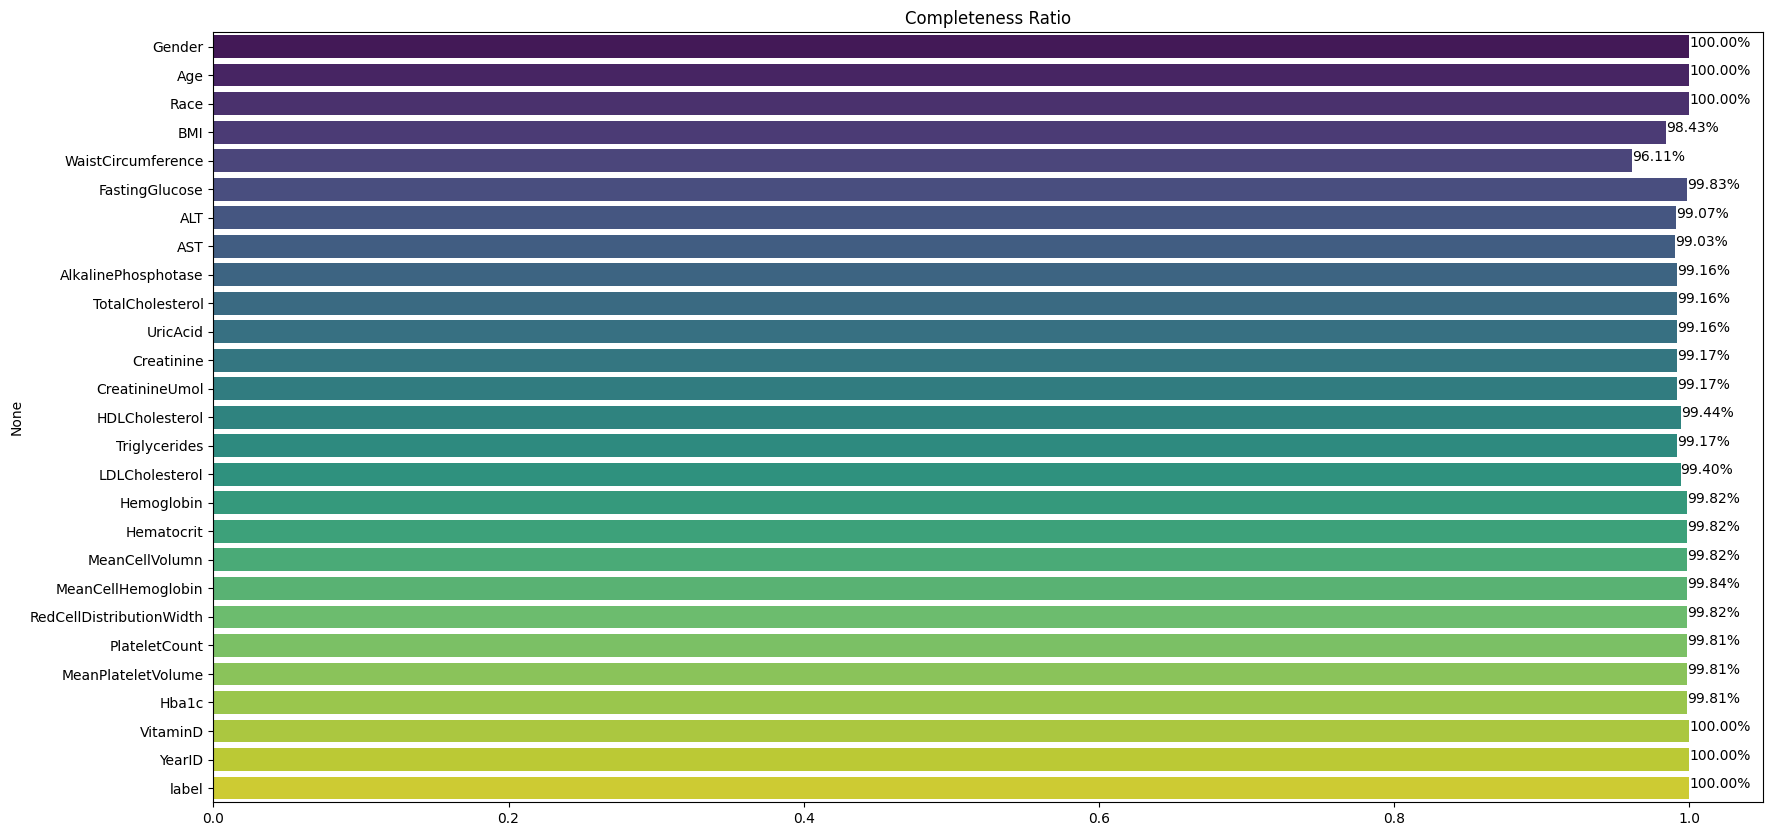

In [101]:
check_missing_ratio(df)

In [ ]:
# Imputation BMI 

In [ ]:
# Imputation for WaistCircumference

#### 2. Outlier value

In [25]:
# Drop outlier value
'''
   Strategy to check outlier:
    1. Use boxplot to visualize outliers
    2. Use Z-score to detect outliers
      2.1 If Z-score > 3 and greater than max normal range value => outlier
    3. Measure Consistency ratio
'''
          
def check_and_drop_outlier(df_check):
    df_dq = df_check.copy()
    for col in df_dq.columns:
        if col in measures_dict.keys():
          # Calculate Z-score of column
          z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
          max_value = 0
          min_value = 0
          if measures_dict[col].get("both"):
            # get max value and min value
            max_value = max(measures_dict[col]["both"].values())
            min_value = min(measures_dict[col]["both"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))
            
            df_dq = df_dq[~outlier_condition]
            print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
          else:
            num_invalid_range = 0

            if measures_dict[col].get("female"):
              # get max value and min value
              max_value = max(measures_dict[col]["female"].values())
              min_value = min(measures_dict[col]["female"].values())

              # check outlier
              outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 2)

              num_invalid_range += outlier_condition.sum()

              df_dq = df_dq[~outlier_condition]

            if measures_dict[col].get("male"):
              # get max value and min value
              max_value = max(measures_dict[col]["male"].values())
              min_value = min(measures_dict[col]["male"].values())

              # check outlier
              outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 1)

              num_invalid_range += outlier_condition.sum()
              
              df_dq = df_dq[~outlier_condition]

            print(f"Ratio of outlier for {col}: {num_invalid_range/len(df_dq):.2%}")
          
        elif col in col_blood_dict:
          # Check outlier for blood columns
          z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
          max_value = col_blood_dict[col].get("max")
          min_value = col_blood_dict[col].get("min")

          # check outlier
          outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))

          df_dq = df_dq[~outlier_condition]

          print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
        
    return df_dq

In [26]:
df = check_and_drop_outlier(df)

Ratio of outlier for BMI: 1.18%
Ratio of outlier for WaistCircumference: 0.25%
Ratio of outlier for UricAcid: 0.07%
Ratio of outlier for ALT: 0.85%
Ratio of outlier for AST: 1.41%
Ratio of outlier for AlkalinePhosphotase: 3.00%
Ratio of outlier for Creatinine: 0.70%
Ratio of outlier for HDLCholesterol: 1.02%
Ratio of outlier for Triglycerides: 1.06%
Ratio of outlier for LDLCholesterol: 0.71%
Ratio of outlier for Hemoglobin: 0.72%
Ratio of outlier for Hematocrit: 0.13%
Ratio of outlier for MeanCellVolumn: 0.65%
Ratio of outlier for MeanCellHemoglobin: 0.18%
Ratio of outlier for RedCellDistributionWidth: 1.48%
Ratio of outlier for PlateletCount: 0.13%
Ratio of outlier for MeanPlateletVolume: 0.69%
Ratio of outlier for Hba1c: 2.30%


/tmp/ipykernel_25297/3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
/tmp/ipykernel_25297/3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
/tmp/ipykernel_25297/3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
/tmp/ipykernel_25297/3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
/tmp/ipykernel_25297/3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
/tmp/ipykernel_25297/3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]


In [27]:
df['label'].value_counts()

label
1    14989
0     8046
2      496
Name: count, dtype: int64

#### 3. Feature Engineering & Feature Selection

In [28]:
# Extract year from YearId - Get final year for each cycle
df['Year'] = df['YearID'].apply(lambda x: str(x)[5::])

df['Year'] = df['Year'].astype(int)

# Drop YearID column
df.drop(columns=['YearID'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [29]:
# One hot encoding for race column
df['Race'].value_counts()

Race
3.0    9973
4.0    4858
1.0    4438
5.0    2333
2.0    1929
Name: count, dtype: int64

In [30]:
df['Race'].apply(lambda x: 1 if x == 2 else x) # group 1 and 2

0        3.0
1        3.0
2        3.0
3        3.0
4        1.0
        ... 
23526    1.0
23527    1.0
23528    3.0
23529    5.0
23530    3.0
Name: Race, Length: 23531, dtype: float64

In [31]:
# Get dummies for Race
df = pd.get_dummies(df, columns=["Race"], prefix="Race")

In [32]:
count = df[df['Hba1c'].isna() & df['FastingGlucose'].notna()].shape[0]
print(f"Number of rows with Creatinine is NaN but CreatinineUmol is not NaN: {count}")

Number of rows with Creatinine is NaN but CreatinineUmol is not NaN: 41


#### 4. Statistic

###  Training model

In [33]:
df_dq['label'] = df['VitaminD'].apply(
    lambda x: 0 if  x < 50  else 1 if (x >= 50 and x < 125) else 2
)

<Axes: title={'center': 'Vitamin D Label Distribution'}, xlabel='label'>

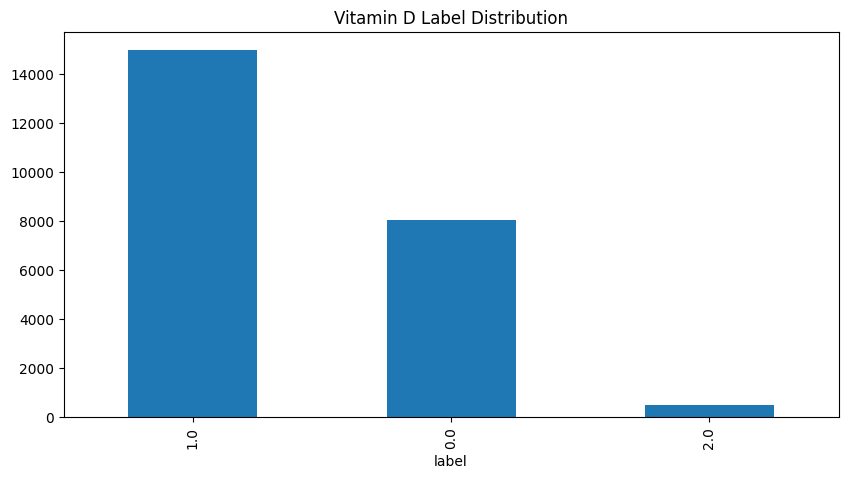

In [34]:
df_dq['label'].value_counts().plot(kind='bar', figsize=(10, 5), title='Vitamin D Label Distribution')

In [36]:
# Import metrics and  standard scaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


In [37]:
remove_columns = [
    'VitaminD',
    'FastingGlucose',
    'UricAcid',
    'TotalCholesterol',
    'CreatinineUmol',
    'MeanPlateletVolume',
    'PlateletCount',
    'RedCellDistributionWidth',
    'MeanCellHemoglobin',
    'MeanCellVolumn',
    'Hematocrit',
    'Hemoglobin'
]

category_columns = ['Gender', 'Race', 'label']

sc = StandardScaler()

df_dq = df_dq.drop(columns=remove_columns)

for col in df_dq.columns:
    if col not in category_columns:
        df_dq[col] = sc.fit_transform(df_dq[[col]])

# Split data into train and test sets
X = df_dq.drop(columns=['label'])
y = df_dq['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/home/iset1enloc/G8Vitamin/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/iset1enloc/G8Vitamin/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/iset1enloc/G8Vitamin/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input y contains NaN.

In [38]:
# xay dung model xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Roi rac hoa du lieu

#Scale de chay

#training mo hinh theo stacking boosting